<a href="https://colab.research.google.com/github/jdchen5/machinelearninglabs/blob/main/CProject/fraud-withSections-stackedModels-balanced-nodrop-JC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import subprocess
import sys

# Check if colorama is installed and attempt to install it if not
try:
    import colorama
    print("Colorama is already installed.")
except ImportError as e:
    print("Colorama not found. Installing colorama...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "colorama"])
    try:
        import colorama
        print("Colorama installed successfully.")
    except ImportError:
        print("Failed to install colorama.")

Colorama not found. Installing colorama...
Colorama installed successfully.


In [3]:
try:
    from skopt import BayesSearchCV
    print("scikit-optimize is already installed.")
except ImportError:
    print("scikit-optimize not found. Installing scikit-optimize...")
    !pip install scikit-optimize
    # After installation, try importing again
    try:
        from skopt import BayesSearchCV
        print("scikit-optimize has been successfully installed.")
    except ImportError:
        print("Failed to install scikit-optimize.")

scikit-optimize not found. Installing scikit-optimize...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 2.1 MB/s eta 0:00:00
scikit-optimize has been successfully installed.


<span style="color: blue;font-weight: bold; font-size: 40px;">Cornerstone Project: Fraud Dection Classification </span>

Fraud detection in the financial industry is a critical issue, as fraudulent activities can lead to significant financial losses and damage an institution's reputation. As financial transactions become more complex and fraud schemes more sophisticated, advanced detection methods are necessary. Fraud detection in banking transactions involves a set of processes and analyses that financial institutions use to prevent and identify unauthorised financial activity. This can include a wide range of illicit acts, such as identity theft, payment fraud, and account takeover, which can result in unauthorised bank transfers, credit card transactions, and other financial operations. Financial institutions continuously monitor transactions in real-time to spot unusual patterns or anomalies that could indicate fraudulent activity. The main goal is to identify patterns that deviate from expected behaviour, given the sophisticated techniques employed by fraudsters. For example, a transaction that doesn't align with the customer's typical behaviour, such as a large withdrawal or a purchase in a foreign country, might raise a flag.

This section includes importing necessary libraries, setting up the notebook's structure, and a table of contents for quick navigation.

In [4]:
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


<a id = 'Index:'></a>

# Table of Content

In this notebook you will apply xxxxxxx


- [Part 1](#part1)- Data Loading and Initial Exploration
- [Part 2](#part2)- Data Cleaning and Preprocessing
- [Part 3](#part3)- Exploratory Data Analysis (EDA)
- [Part 4](#part4)- Feature Engineering and Selection
- [Part 5](#part5)- Model Preparation
- [Part 6](#part6)- Baseline Modeling and Evaluation
- [Part 7](#part7)- Advanced Modeling and Hyperparameter Tuning
- [Part 8](#part8)- Model Comparison and Selection
- [Part 9](#part9)- End



In [5]:
def print_timestamp():
    # Print out the timestamp
    print("Current Timestamp: ", datetime.now())

[Back to top](#Index:)

<a id='part1'></a>

# Part 1 -Data Loading and Initial Exploration

This section is dedicated to loading the dataset, performing initial data exploration such as viewing the first few rows, and summarizing the dataset's characteristics, including missing values and basic statistical measures.

In [6]:
# Replace 'your_data.csv' with the path to your data file
#df = pd.read_csv('/content/gdrive/My Drive/Pythoncode/CProject/data/fraud_dataset_example.csv')

df = pd.read_csv('https://raw.githubusercontent.com/jdchen5/imperialMLnAI_CSproject/main/data/fraud_dataset_example.csv')

##Identify the Features and Their Types:
Use .info() to get a concise summary of the DataFrame, including the column names, non-null counts, and data types.

In [7]:
print(df.head())
print_timestamp()

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  
Current Timestamp:  2024-04-12 16:28:53.773780


In [8]:
print(f'The Data consist:\n Total Rows: {df.shape[0]}\n Total columns: {df.shape[1]}')
print_timestamp()

The Data consist:
 Total Rows: 101613
 Total columns: 11
Current Timestamp:  2024-04-12 16:28:55.970086


[Back to top](#Index:)

<a id='part2'></a>

# Part 2 - Data Cleaning and Preprocessing

Here, data cleaning tasks like handling missing values and providing a detailed summary of each feature, including its type, number of unique values, and a preview of unique values, are performed.

In [9]:
print(f'Total missing value in Percentage: \n {round(df.isnull().sum()/df.shape[0],2)}')
print_timestamp()

Total missing value in Percentage: 
 step              0.0
type              0.0
amount            0.0
nameOrig          0.0
oldbalanceOrg     0.0
newbalanceOrig    0.0
nameDest          0.0
oldbalanceDest    0.0
newbalanceDest    0.0
isFraud           0.0
isFlaggedFraud    0.0
dtype: float64
Current Timestamp:  2024-04-12 16:28:59.360520


In [11]:
#missing value replacement using random samples imputer
def impute_nan(df,variable):
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable]=random_sample

In [10]:
#clear view of data

# Create an empty list to store the summary information
list_item = []

# Iterate over each column in the DataFrame
for col in df.columns:
    # Append the column name, data type, number of nulls, percentage of nulls, and unique value counts to the list
    list_item.append([col, df[col].dtype, df[col].isnull().sum(), (df[col].isnull().sum()/df.shape[0]), len(df[col].unique()), df[col].unique()[:4]])

# Create a DataFrame from the list with specified column names
des_df = pd.DataFrame(data=list_item, columns=['Feature', 'data_type', 'Null_number', 'Null_pct', 'Unique_counts', 'unique_value'])

print_timestamp()
# Display the summary DataFrame
des_df


Current Timestamp:  2024-04-12 16:29:03.330538


,Feature,data_type,Null_number,Null_pct,Unique_counts,unique_value
0,step,int64,0,0.0,10,"[1, 2, 3, 4]"
1,type,object,0,0.0,5,"[PAYMENT, TRANSFER, CASH_OUT, DEBIT]"
2,amount,float64,0,0.0,101069,"[9839.64, 1864.28, 181.0, 11668.14]"
3,nameOrig,object,0,0.0,101613,"[C1231006815, C1666544295, C1305486145, C84008..."
4,oldbalanceOrg,float64,0,0.0,59037,"[170136.0, 21249.0, 181.0, 41554.0]"
5,newbalanceOrig,float64,0,0.0,49018,"[160296.36, 19384.72, 0.0, 29885.86]"
6,nameDest,object,0,0.0,52280,"[M1979787155, M2044282225, C553264065, C38997010]"
7,oldbalanceDest,float64,0,0.0,54585,"[0.0, 21182.0, 41898.0, 10845.0]"
8,newbalanceDest,float64,0,0.0,19741,"[0.0, 40348.79, 157982.12, 51513.44]"
9,isFraud,int64,0,0.0,2,"[0, 1]"


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,101613.0,8.523457e+00,1.820681e+00,1.00,8.00,9.00,10.00,10.00
amount,101613.0,1.740901e+05,3.450199e+05,0.32,10016.59,53385.41,212498.40,10000000.00
oldbalanceOrg,101613.0,9.071753e+05,2.829575e+06,0.00,0.00,20190.47,194715.00,38939424.03
newbalanceOrig,101613.0,9.234992e+05,2.867319e+06,0.00,0.00,0.00,219217.76,38946233.02
oldbalanceDest,101613.0,8.810428e+05,2.399949e+06,0.00,0.00,21058.00,591921.70,34008736.98
newbalanceDest,101613.0,1.183998e+06,2.797761e+06,0.00,0.00,51783.43,1063121.64,38946233.02
isFraud,101613.0,1.141586e-03,3.376824e-02,0.00,0.00,0.00,0.00,1.00
isFlaggedFraud,101613.0,0.000000e+00,0.000000e+00,0.00,0.00,0.00,0.00,0.00


In [13]:
print(f"Percentage of fraud to total samples: {round((df[df['isFraud'] == 1].shape[0] / df.shape[0]) * 100, 2)}%")
print(f"\nPercentage of fraud flagged to total samples: {round((df[df['isFlaggedFraud'] == 1].shape[0] / df.shape[0]) * 100, 2)}%")
print_timestamp()

Percentage of fraud to total samples: 0.11%

Percentage of fraud flagged to total samples: 0.0%
Current Timestamp:  2024-04-12 16:29:18.652628


In [14]:
# Perform a Descriptive Statistical Summary:
#Use .describe() to generate descriptive statistics that summarize the central tendency, dispersion, and shape of the dataset’s distribution, excluding NaN values.
summary_stats=df.describe(include='all')  # include='all' will also summarize categorical data
print(summary_stats)
print_timestamp()

                 step     type        amount     nameOrig  oldbalanceOrg  \
count   101613.000000   101613  1.016130e+05       101613   1.016130e+05   
unique            NaN        5           NaN       101613            NaN   
top               NaN  PAYMENT           NaN  C1231006815            NaN   
freq              NaN    40062           NaN            1            NaN   
mean         8.523457      NaN  1.740901e+05          NaN   9.071753e+05   
std          1.820681      NaN  3.450199e+05          NaN   2.829575e+06   
min          1.000000      NaN  3.200000e-01          NaN   0.000000e+00   
25%          8.000000      NaN  1.001659e+04          NaN   0.000000e+00   
50%          9.000000      NaN  5.338541e+04          NaN   2.019047e+04   
75%         10.000000      NaN  2.124984e+05          NaN   1.947150e+05   
max         10.000000      NaN  1.000000e+07          NaN   3.893942e+07   

        newbalanceOrig    nameDest  oldbalanceDest  newbalanceDest  \
count     1.01613

This calculates the skewness of numerical columns in a DataFrame to assess the asymmetry of their distributions, with values near zero indicating symmetry and values deviating from zero indicating skewness (positive for right skew, negative for left skew).

In [15]:
#Identify Skewness:
#Check the skewness of the distribution of numerical data. A skewness value closer to 0 indicates a more symmetric distribution, while a value far from 0 indicates a skewed distribution.
numeric_cols = df.select_dtypes(include=[np.number])
skewness = numeric_cols.skew()
# A skewness value:
#Closer to 0 indicates a more symmetric distribution;
#Greater than 0 indicates a right-skewed (or positively skewed) distribution.
#Less than 0 indicates a left-skewed (or negatively skewed) distribution.

print(skewness)
print(numeric_cols)
print_timestamp()

step              -2.553444
amount             5.425476
oldbalanceOrg      5.295054
newbalanceOrig     5.223139
oldbalanceDest     5.059426
newbalanceDest     4.322121
isFraud           29.546591
isFlaggedFraud     0.000000
dtype: float64
        step      amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0          1     9839.64      170136.00       160296.36            0.00   
1          1     1864.28       21249.00        19384.72            0.00   
2          1      181.00         181.00            0.00            0.00   
3          1      181.00         181.00            0.00        21182.00   
4          1    11668.14       41554.00        29885.86            0.00   
...      ...         ...            ...             ...             ...   
101608    10     7477.02         785.00            0.00            0.00   
101609    10   282252.35      220339.29            0.00        95156.01   
101610    10    17289.01           0.00            0.00            0.00   
101611    1

[Back to top](#Index:)

<a id='part3'></a>

# Part 3 - Exploratory Data Analysis (EDA)

This section focuses on exploratory data analysis through various visualizations such as histograms, box plots, correlation heatmaps, and pair plots to understand the distributions, relationships, and correlations among the features.

This creates a grid of histograms for a set list of numerical variables, organising them into a 2x3 subplot structure to analyse their distributions.

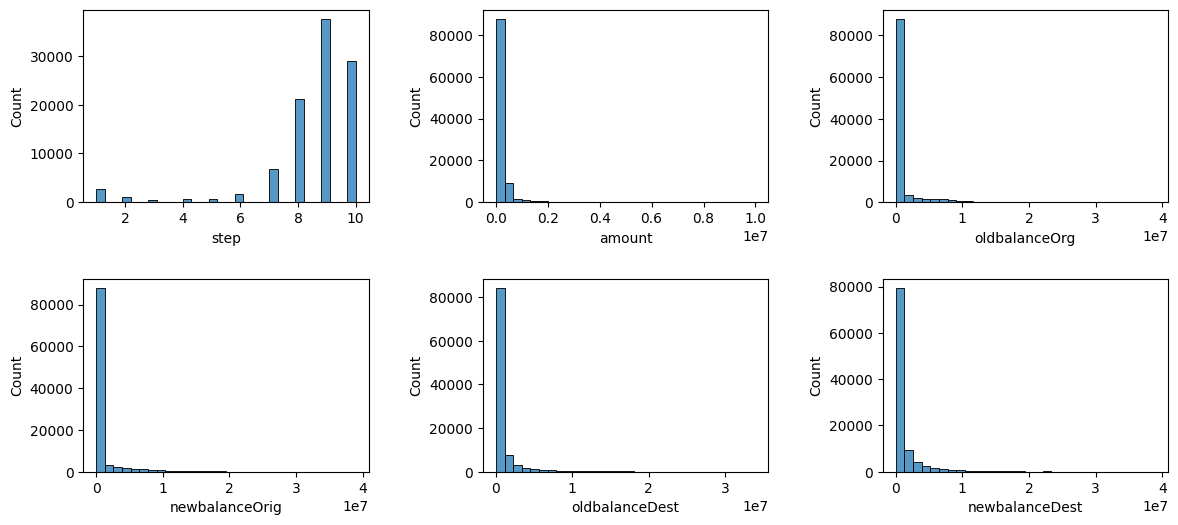

Current Timestamp:  2024-04-12 16:29:41.691597


In [16]:
# List of numerical variables to visualize
num1 = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
        'oldbalanceDest', 'newbalanceDest']

# Set up a grid of plots with 4 rows and 3 columns
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(14, 6))
fig.subplots_adjust(hspace=0.4, wspace=0.4)  # Adjust spacing to prevent label overlap

# Flatten the array of axes to make it easier to iterate over
axs = axs.flatten()

# Loop through the list of variables and create a histogram for each
for i, var in enumerate(num1):
    sns.histplot(x=var, data=df, ax=axs[i], bins=30)

# Remove any empty subplots (if num1 has less than 6 variables)
for ax in axs[len(num1):]:
    ax.remove()

# Display the plots
plt.show()
print_timestamp()

This generates individual box plots for each numerical variable in a list, providing visual insight into their distribution, central tendency, and outliers.

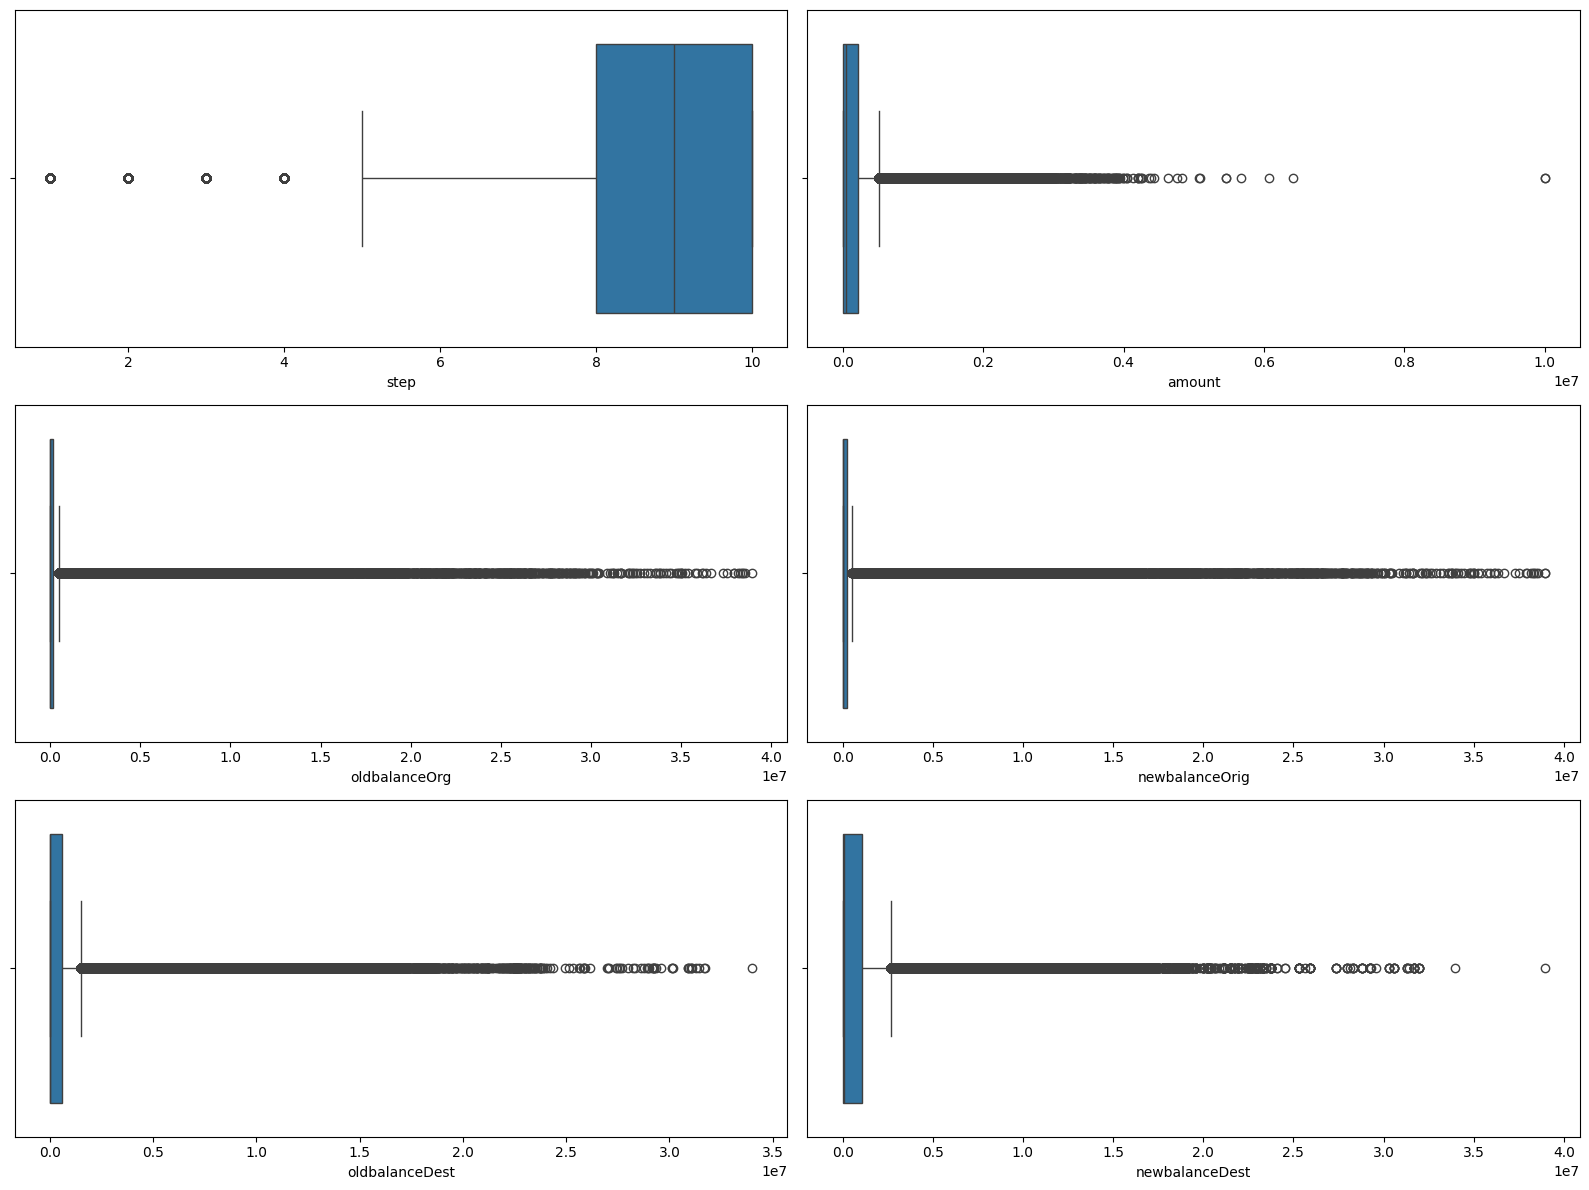

Current Timestamp:  2024-04-12 16:29:51.657647


In [17]:
# List of numerical variables to visualize
num1 = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
        'oldbalanceDest', 'newbalanceDest']

# Set up a grid of plots with 2 rows and 3 columns to match the length of num1
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(16, 12))

# Flatten the array of axes to make it easier to iterate over
axs = axs.flatten()

# Loop through the list of variables and create a box plot for each
for i, var in enumerate(num1):
    sns.boxplot(x=var, data=df, ax=axs[i])  # Create a box plot for the variable `i`

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()
print_timestamp()

# **Heatmap:**
*   Red colors represent positive correlations.
*   Blue colors represent negative correlations.
*   The intensity of the color represents the strength of the correlation, with darker shades indicating stronger relationships (either positive or negative).

***Observation:***
*   'oldbalanceOrg' and 'newbalanceOrig' have a very high positive correlation (1), suggesting that when one increases, the other tends to increase as well.
*   'oldbalanceDest' and 'newbalanceDest' have a very high positive correlation (0.94), suggesting that when one increases, the other tends to increase as well.
*   'amount' seems to have a moderate positive correlation with 'oldbalanceDest' and 'newbalanceDest' (0.24 and 0.37, respectively).
*   'isFraud' doesn't seem to have a strong correlation with any of the other variables, indicating that none of these variables strongly predict fraud on their own.
* The rest of the correlations appear to be very weak, as they are close to 0.

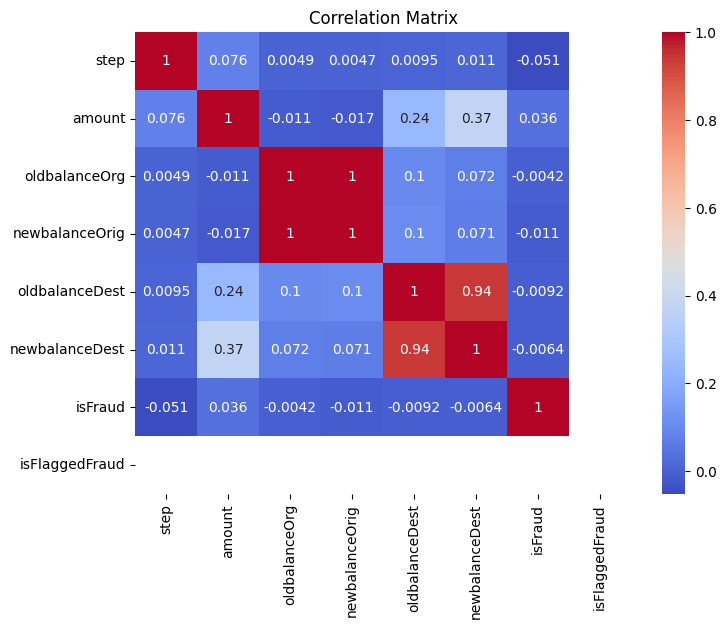

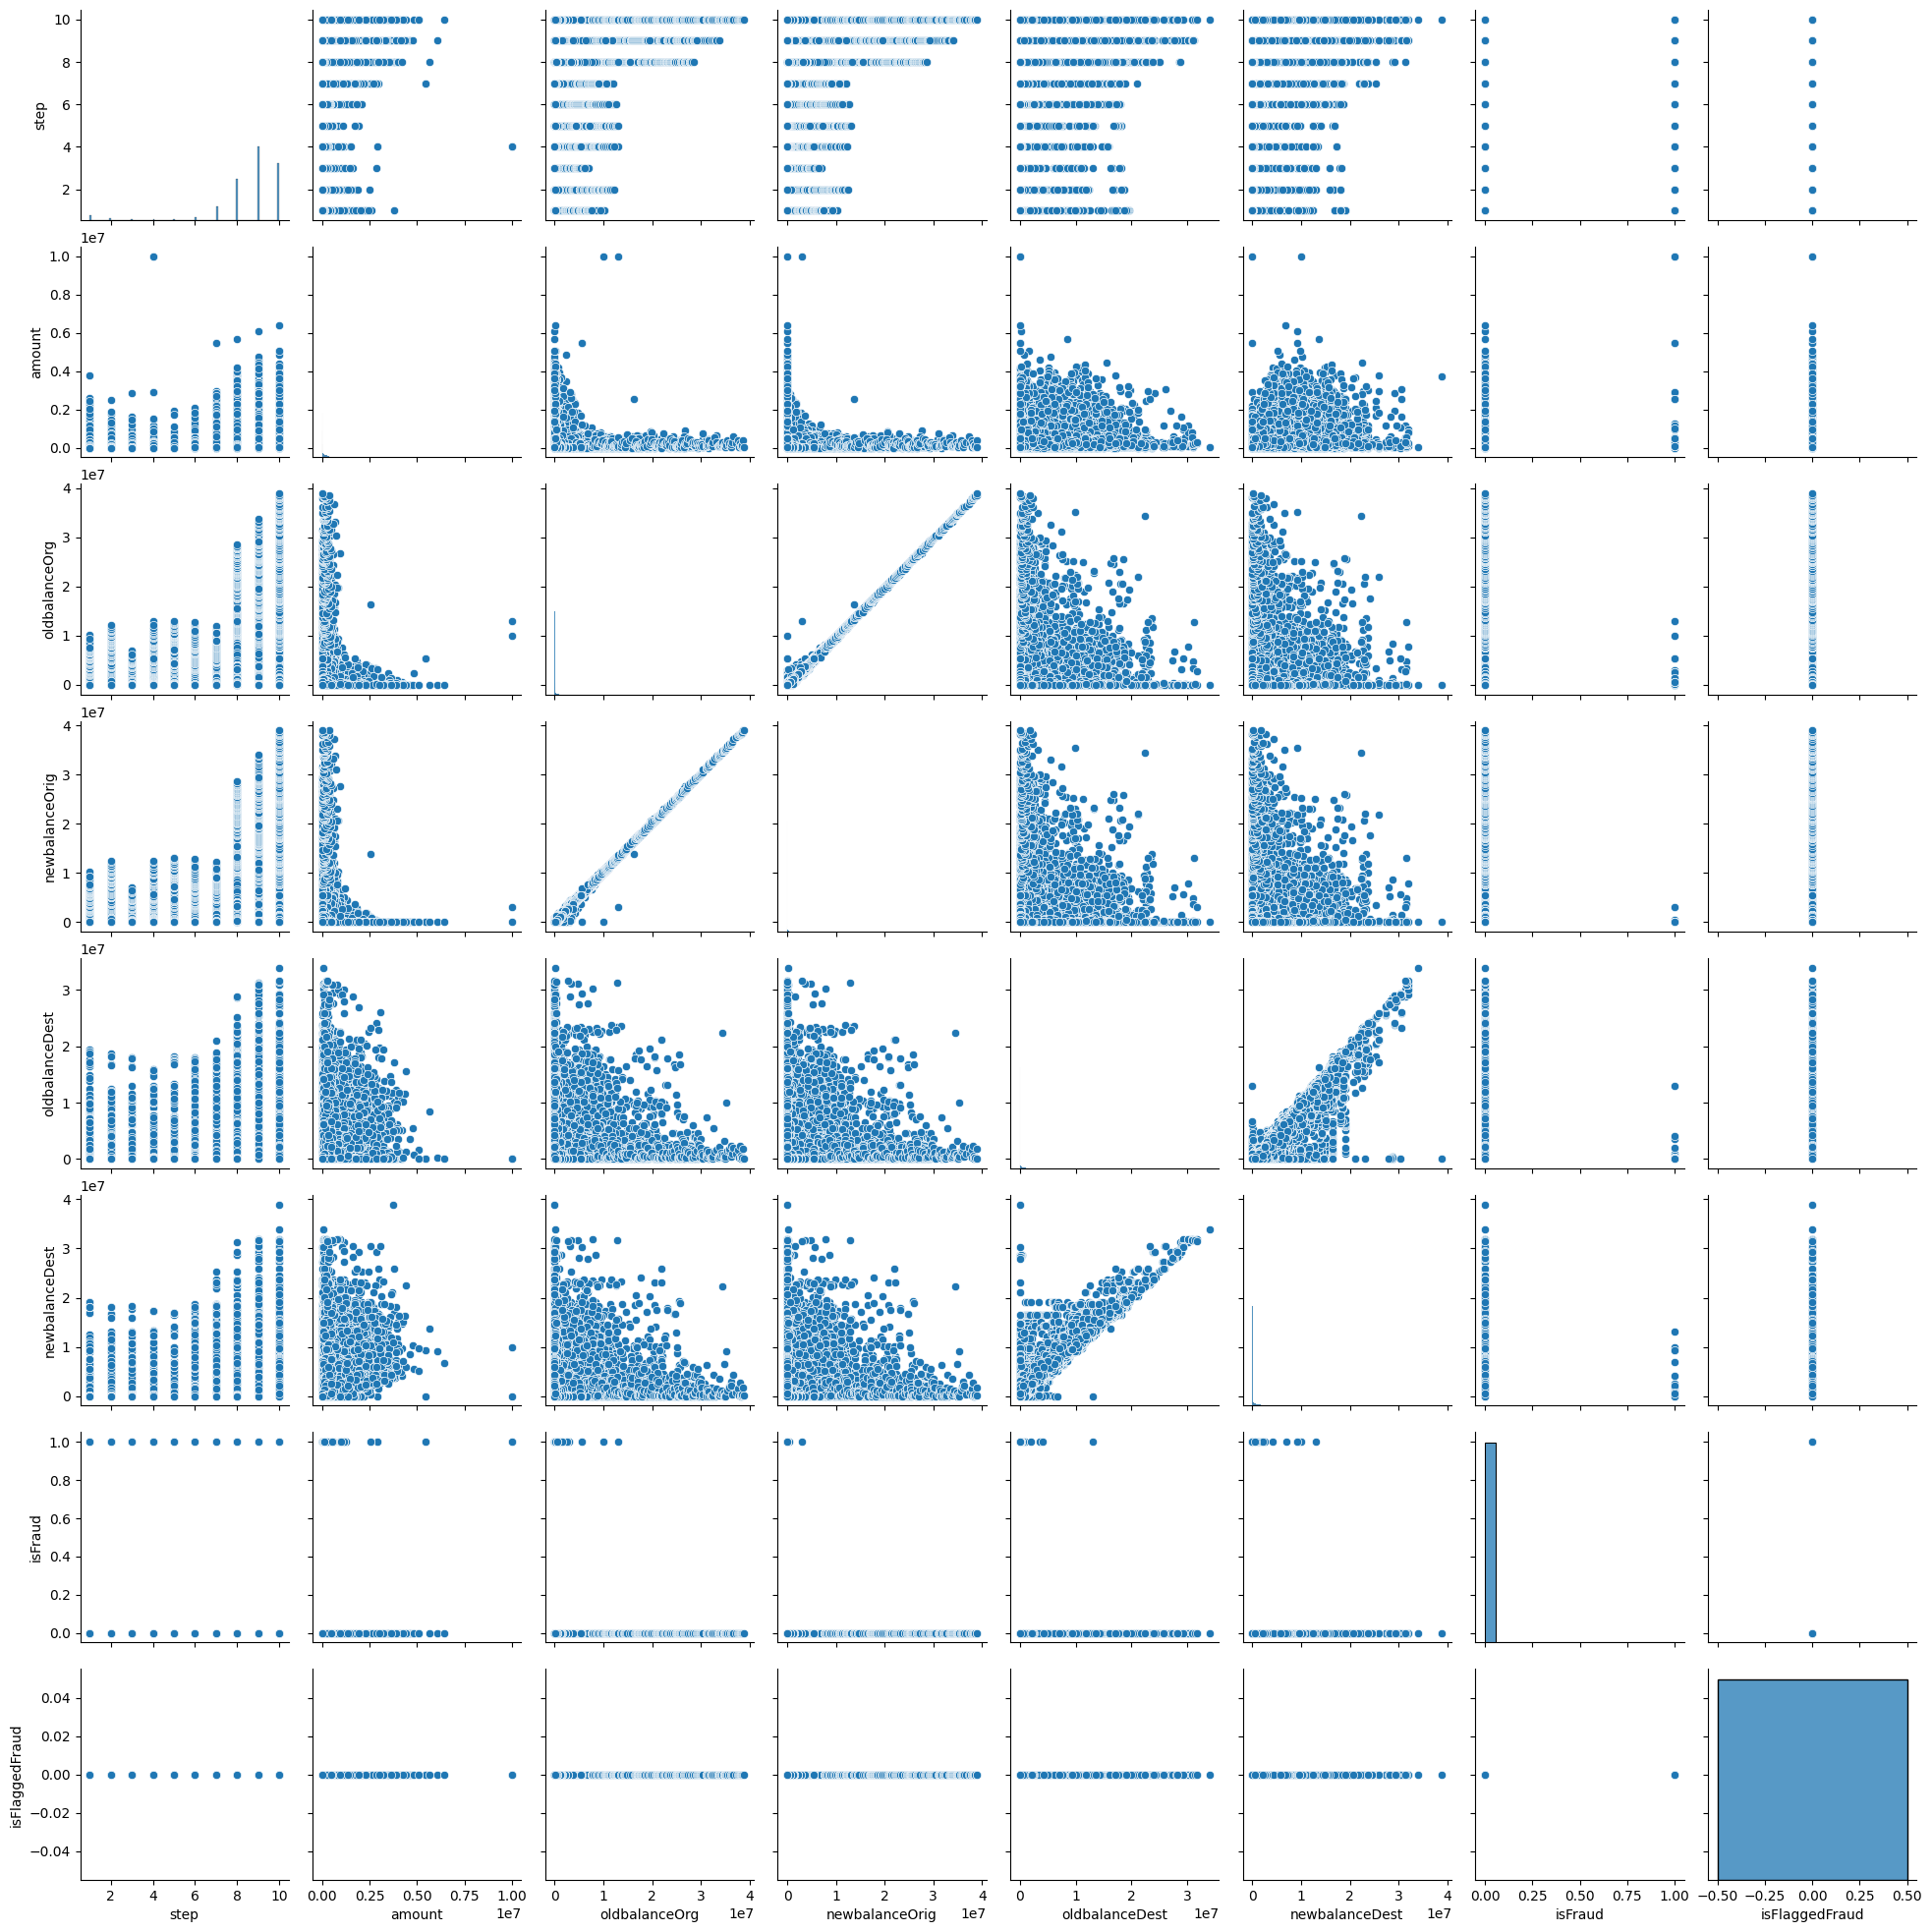

Current Timestamp:  2024-04-12 16:30:57.514185


In [18]:
# Correlation Heatmap:
# A heatmap to understand the correlation between numerical features and potentially the isFraud label.
# This will help to see if any feature strongly correlates with the occurrence of fraud.
# Calculate the correlation matrix
correlations = df.corr(numeric_only=True)

# Plotting the correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Pairplot to visualize relationships
sns.pairplot(df)
plt.show()
print_timestamp()

This plots a line graph of transaction amounts over time steps, differentiated by whether the transaction is fraudulent or not, to identify potential temporal patterns in fraud occurrence.

***Observations:***
* There are spikes in the amount for both fraudulent and non-fraudulent transactions, suggesting that at certain time steps, the transaction amounts are significantly higher.
* The fraudulent transactions (orange line) seem to have higher peaks than non-fraudulent ones, which could imply that when fraud occurs, the transaction amounts tend to be larger.
* The pattern is not regular or periodic based on this graph, but rather it shows discrete peaks at certain time steps.

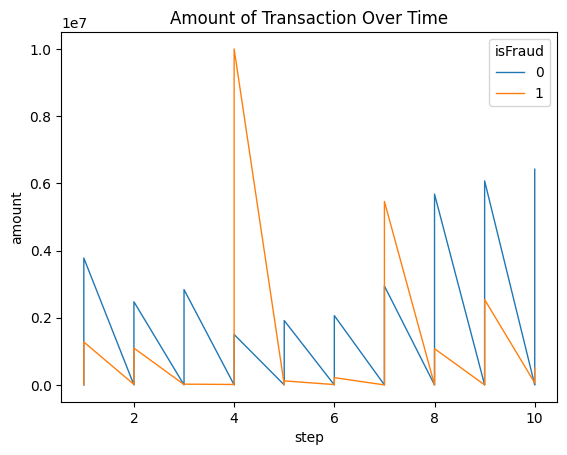

Current Timestamp:  2024-04-12 16:30:58.083527


In [19]:
# Time Step Analysis:
# Plot the time step (step) against other features to understand if there's a pattern over time.
# For instance, you could plot a line or bar chart to see if fraud occurrences increase at certain time steps.

sns.lineplot(x='step', y='amount', data=df, hue='isFraud', estimator=None, lw=1)
plt.title('Amount of Transaction Over Time')
plt.show()

print_timestamp()

This generates a boxplot comparing the distribution of transaction amounts by type, with a separate coloration for fraudulent transactions, and uses a logarithmic scale for better visualisation of a wide range of amounts.

***Key observations:***
* There are outliers in transaction amounts for both fraudulent and non-fraudulent transactions across all transaction types.
* Certain types of transactions, such as TRANSFER and CASH_OUT, may have higher transaction amounts associated with fraud (orange boxes) compared to non-fraudulent transactions (blue boxes).
* The logarithmic scale allows us to see differences across a wide range of values and suggests that the data spans several orders of magnitude.

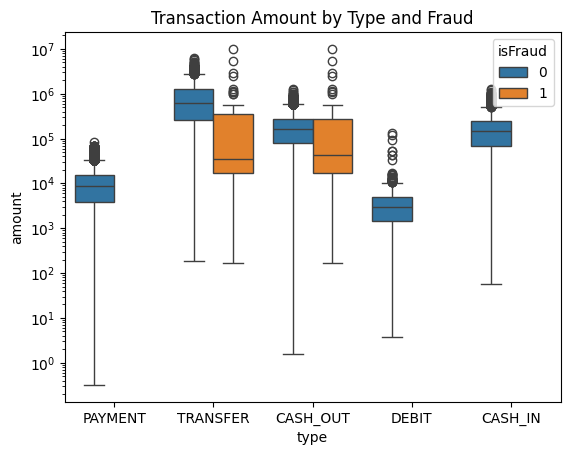

Current Timestamp:  2024-04-12 16:30:59.288744


In [20]:
# Boxplots for Transaction Amount by Type:
# Boxplots grouped by transaction type and colored by fraud to see the distribution of amounts across different types of transactions and how they relate to fraud.
sns.boxplot(x='type', y='amount', data=df, hue='isFraud')
plt.title('Transaction Amount by Type and Fraud')
plt.yscale('log')  # Use log scale due to large range of transaction amounts
plt.show()
print_timestamp()

[Back to top](#Index:)

<a id='part4'></a>

# Part 4 - Feature Engineering and Selection

Involves creating or selecting specific features for the model based on insights from EDA, including handling categorical variables and reducing dimensionality if necessary.

In [21]:
obj1 = ['type', 'nameOrig', 'nameDest']

In [22]:
# Import the necessary libraries for hypothesis testing
from scipy.stats import chi2_contingency
#import stats as stat
import colorama
from colorama import Fore

This performs a Chi-square test on each categorical variable in obj1 to evaluate if it is a significant predictor of the target variable isFraud, indicating variables as "good" or "bad" predictors based on a 95% confidence level.

In [23]:
# Chi-square test to determine whether each categorical variable in a dataset is a good predictor of the target variable isFraud.
for i in obj1:
    print("-"*100)
    a = np.array(pd.crosstab(df['isFraud'], df[i]))         # creates a contigency table beteween each categorical variable and the target vairable
    (stats, p, dof, _) = chi2_contingency(a, correction=False)  # performs the Chi-squar test of independence
    if p >= 0.05:    #at a 95% confidence level
        print(Fore.RED + "{} is Bad predictor\n".format(i))
        print("P_value={:.2f}\n".format(p))
    else:
        print(Fore.GREEN + "{} is Good Predictor\n".format(i))
        print("P_value={:.2f}\n".format(p))

print_timestamp()

----------------------------------------------------------------------------------------------------
type is Good Predictor

P_value=0.00

----------------------------------------------------------------------------------------------------
nameOrig is Bad predictor

P_value=0.50

----------------------------------------------------------------------------------------------------
nameDest is Bad predictor

P_value=1.00

Current Timestamp:  2024-04-12 16:31:29.757053


In [24]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols
import statsmodels.api as smf

This conducts an ANOVA test for each numerical variable in num1 to see if there are statistically significant differences across categories of the isFraud target variable, labeling variables as "good" or "bad" predictors based on the p-value, and performing further post-hoc analysis with the Tukey HSD test if necessary.

In [25]:
# Anova test for numerical values differ significantly across different catefories of the target variable
for i in num1:
    print("_"*100)
    print(i + ":\n")
    print("Anova:\n")
    formula = '{} ~ isFraud'.format(i)  # dynamically create the formula string
    mod = ols(formula, data=df).fit()    #  fits an Ordinary Least Squares (OLS) regression model based on the formula. The ols function comes from the statsmodels package.
    aov_table = smf.stats.anova_lm(mod, typ=2)   # performs the ANOVA test using the fitted model. The anova_lm function generates an ANOVA table. typ=2 specifies the type of sum of squares to be used in the test.
    print(aov_table, '\n')
    print('p_value={:.2f}\n'.format(aov_table['PR(>F)'][0]))
    p=aov_table['PR(>F)'][0]

    if p>0.05:  #
        print(Fore.RED + "'{}' is 'bad predictor'\n".format(i))
        print('Avg of this feature is same for both loan default and non default group\n')
        print("p_val(p) = {}\n".format(p))
    else:
        print('TUKEY:\n')
        print(Fore.GREEN +"'{}' is a 'good Predictor'\n".format(i))
        print('Avg of this feature is not same for both fraud group and non fraud group\n')
        print('We need to perform Tukey as atleast one category \n')
        print(Fore.GREEN +" '{}' is a 'good Predictor'\n".format(i))
        tukey=pairwise_tukeyhsd(df[i],df.isFraud,alpha=0.05)  # performs the Tukey HSD post-hoc test to determine which specific groups in isFraud are different in terms of the mean of variable i.
        print(tukey,'\n')

print_timestamp()

____________________________________________________________________________________________________
step:

Anova:

                 sum_sq        df           F        PR(>F)
isFraud      893.298942       1.0  270.195653  1.232291e-60
Residual  335938.042147  101611.0         NaN           NaN 

p_value=0.00

TUKEY:

'step' is a 'good Predictor'

Avg of this feature is not same for both fraud group and non fraud group

We need to perform Tukey as atleast one category 

 'step' is a 'good Predictor'

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1  -2.7766   0.0 -3.1077 -2.4456   True
--------------------------------------------------- 

____________________________________________________________________________________________________
amount:

Anova:

                sum_sq        df           F        PR(>F)
isFraud   1.568344e+13       1.0  131.920453  1.626484e

In [33]:
#Only drop 'nameOrig' as it caused issues in Correlation Matrix
#Drop the columns based on the hypothesis testing and correlation matrix
df1=df.drop(['nameOrig'],axis=1)


In [34]:
df1.select_dtypes(include='object').columns

Index([], dtype='object')

In [35]:
# Function to replace categorical values with percentages
def replace_with_percentage(column):
    counts = column.value_counts(normalize=True)
    return column.map(counts)*100

In [36]:
for col in df1.select_dtypes(include=['object']).columns:
    df1[col] = replace_with_percentage(df1[col])

In [37]:
df1.head(10)

,step,type,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,39.426058,9839.64,170136.00,160296.36,0.000984,0.0,0.00,0,0
1,1,39.426058,1864.28,21249.00,19384.72,0.000984,0.0,0.00,0,0
2,1,8.551071,181.00,181.00,0.00,0.006889,0.0,0.00,1,0
3,1,30.812987,181.00,181.00,0.00,0.004921,21182.0,0.00,1,0
4,1,39.426058,11668.14,41554.00,29885.86,0.000984,0.0,0.00,0,0
5,1,39.426058,7817.71,53860.00,46042.29,0.000984,0.0,0.00,0,0
6,1,39.426058,7107.77,183195.00,176087.23,0.000984,0.0,0.00,0,0
7,1,39.426058,7861.64,176087.23,168225.59,0.000984,0.0,0.00,0,0
8,1,39.426058,4024.36,2671.00,0.00,0.000984,0.0,0.00,0,0
9,1,0.995936,5337.77,41720.00,36382.23,0.019683,41898.0,40348.79,0,0


***Key points:***
* 'oldbalanceDest' and 'newbalanceDest' have a very strong positive correlation of 0.94, indicated by a dark red color, which suggests that these two variables move in the same direction.
* 'type' has a moderately negative correlation with 'amount', 'oldbalanceDest', and 'newbalanceDest' (values of -0.52, -0.27, and -0.33, respectively), indicated by a light blue color.
* 'isFraud' does not seem to have a strong linear correlation with any other variables, as indicated by the colors close to white, which suggests no particular linear relationship.

Current Timestamp:  2024-04-12 16:39:03.030678


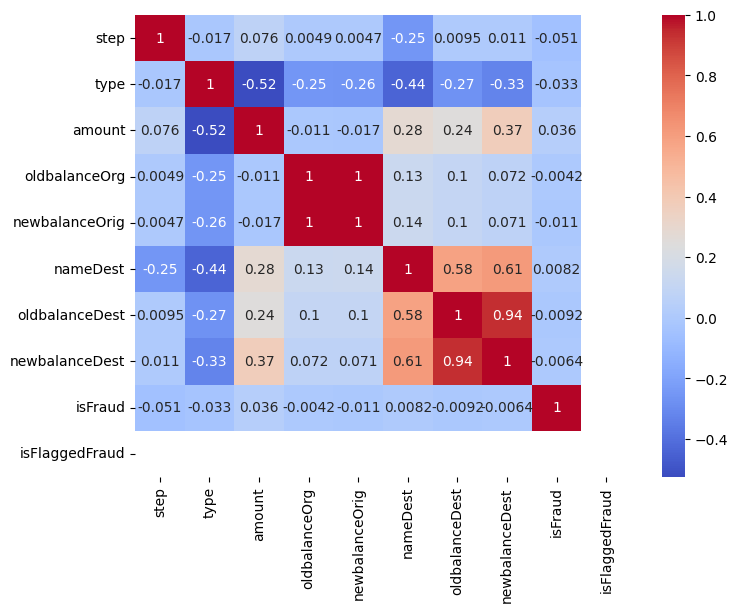

In [38]:
#Correlation matrix after converting the categorical values
plt.figure(figsize=(8,6))
sns.heatmap(data=df1.corr(),cmap='coolwarm',annot=True);

print_timestamp()

[Back to top](#Index:)

<a id='part5'></a>

# Part 5 - Model Preparation

This section deals with preparing the data for modeling, including splitting the data into training, validation, and test sets, along with any final steps of data preparation like scaling or encoding.


In [39]:
from sklearn.model_selection import train_test_split

In [40]:
#Split the data for train and test
X=df1.drop('isFraud',axis=1)  # Features
y=df1.isFraud                 #Target variable

In [41]:
print(X.head())

   step       type    amount  oldbalanceOrg  newbalanceOrig  nameDest  \
0     1  39.426058   9839.64       170136.0       160296.36  0.000984   
1     1  39.426058   1864.28        21249.0        19384.72  0.000984   
2     1   8.551071    181.00          181.0            0.00  0.006889   
3     1  30.812987    181.00          181.0            0.00  0.004921   
4     1  39.426058  11668.14        41554.0        29885.86  0.000984   

   oldbalanceDest  newbalanceDest  isFlaggedFraud  
0             0.0             0.0               0  
1             0.0             0.0               0  
2             0.0             0.0               0  
3         21182.0             0.0               0  
4             0.0             0.0               0  


In [42]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, chart_title):
    """
    Plots a confusion matrix using seaborn's heatmap.

    Parameters:
    y_true : array-like of shape (n_samples,) - True labels of the data.
    y_pred : array-like of shape (n_samples,) - Predicted labels by the classifier.

    Returns: None
    """
    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Create a figure for the plot
    plt.figure(figsize=(7,5))

    # Create a heatmap for the confusion matrix
    sns.heatmap(data=cm, annot=True, cmap="Blues", linewidths=0.5, fmt="d")

    # Label the axes
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")

    # Set the title of the plot
    plt.title(f"{chart_title} Confusion Matrix")

    # Display the plot
    plt.show()

In [43]:
from sklearn.metrics import precision_recall_curve, auc, average_precision_score

def plot_precision_recall_curve(model, X_test, y_test, chart_title):
    """
    Plots the Precision-Recall curve and calculates the AUC for a given model and test data.

    Parameters:
    model : The trained classifier with predict_proba method available.
    X_test : The test set features.
    y_test : The true binary labels for the test set.

    Returns: None
    """
    # Ensure that the model has a predict_proba method
    if not hasattr(model, 'predict_proba'):
        raise AttributeError(f"The passed model doesn't support predict_proba method.")

    # Get the probability scores of the positive class
    y_scores = model.predict_proba(X_test)[:, 1]

    # Calculate precision and recall
    precision, recall, _ = precision_recall_curve(y_test, y_scores)

    # Calculate the average precision score
    pr_auc = average_precision_score(y_test, y_scores)

    # Plot the Precision-Recall curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label=f'Precision-Recall curve (AUC = {pr_auc:.2f})')

    # Labeling the plot
    plt.xlabel('Recall')
    plt.ylabel('Precision')

    plt.title(f"{chart_title} Precision-Recall Curve")
    plt.legend(loc='best')

    # Show the plot
    plt.show()

# Example usage:
# Assuming 'rfc2' is a trained RandomForestClassifier instance
# and you have 'X_test' and 'y_test' data ready
# plot_precision_recall_curve(rfc2, X_test, y_test)


def plot_simplified_precision_recall_curve(precision, recall, pr_auc, chart_title):
    """
    Plots the Precision-Recall curve using provided precision, recall, and AUC values.

    Parameters:
    precision : Array-like, shape = [n_thresholds + 1]
        Precision values.
    recall : Array-like, shape = [n_thresholds + 1]
        Recall values.
    pr_auc : float
        Average precision score or area under the precision-recall curve.

    Returns:
    None
    """
    # Plot the Precision-Recall curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label=f'Precision-Recall curve (AUC = {pr_auc:.2f})')

    # Labeling the plot
    plt.xlabel('Recall')
    plt.ylabel('Precision')

    plt.title(f"{chart_title} Precision-Recall Curve")
    plt.legend(loc='best')

    # Show the plot
    plt.show()

# Example usage:
# Assuming you have the precision, recall, and AUC values calculated elsewhere in your code
# precision = [0.9, 0.8, 0.7] # Example values
# recall = [0.1, 0.2, 0.3] # Example values
# pr_auc = 0.75 # Example value
# plot_simplified_precision_recall_curve(precision, recall, pr_auc, "Your Model")

In [44]:
# Split the data into training plus validation and testing sets with stratification
# This ensures that the proportion of classes in both splits will be the same as in the entire dataset

X_train_val,X_test,y_train_val,y_test=train_test_split(X, y,test_size=0.20,stratify=y, random_state=42)

# Next, split the training plus validation dataset into separate training and validation datasets
# Here, I'm using 80-20 split, but you can adjust the size according to your preference
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, stratify=y_train_val, random_state=42)


In [45]:
# Assuming your training and testing datasets are named X_train, X_test, y_train, y_test respectively
# For the feature DataFrames
num_rows_X_train = X_train.shape[0]
num_rows_X_val = X_val.shape[0]
num_rows_X_test = X_test.shape[0]

# For the target/label DataFrames or Series
num_rows_y_train = y_train.shape[0]
num_rows_y_val = y_val.shape[0]
num_rows_y_test = y_test.shape[0]

print(f'Number of rows in the training features dataset: {num_rows_X_train}')
print(f'Number of rows in the validation features dataset: {num_rows_X_val}')
print(f'Number of rows in the testing features dataset: {num_rows_X_test}')
print(f'Number of rows in the training labels dataset: {num_rows_y_train}')
print(f'Number of rows in the validation labels dataset: {num_rows_y_val}')
print(f'Number of rows in the testing labels dataset: {num_rows_y_test}')

print(X_train.head())
print_timestamp()

Number of rows in the training features dataset: 65032
Number of rows in the validation features dataset: 16258
Number of rows in the testing features dataset: 20323
Number of rows in the training labels dataset: 65032
Number of rows in the validation labels dataset: 16258
Number of rows in the testing labels dataset: 20323
       step       type     amount  oldbalanceOrg  newbalanceOrig  nameDest  \
81003    10  20.213949  424001.58     1339185.31      1763186.89  0.006889   
51402     9  20.213949   52129.87    10020919.23     10073049.10  0.007873   
48571     9  20.213949   15259.67     4515531.92      4530791.59  0.012794   
26935     8  20.213949  191806.91       32852.00       224658.91  0.002952   
40917     9  39.426058   24284.75       69340.00        45055.25  0.000984   

       oldbalanceDest  newbalanceDest  isFlaggedFraud  
81003       778123.76       396580.98               0  
51402       792842.46            0.00               0  
48571       960387.11       412823.25

[Back to top](#Index:)

<a id='part6'></a>

# Part 6 - Baseline Modeling and Evaluation

The initial models are built here to establish a baseline performance. It includes training simple models, evaluating their performance through metrics like accuracy, precision, recall, and plotting confusion matrices and precision-recall curves.

In [46]:
from sklearn.ensemble import RandomForestClassifier
from skopt import BayesSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,auc

import time

In [47]:
# Define column names
columns = ['Model', 'Accuracy (%)', 'Precision', 'Recall', 'F1-Score','PR AUC', 'ROC AUC', 'Exec Time']

# Create an empty DataFrame with these columns
model_performance_df = pd.DataFrame(columns=columns)

# Display the empty DataFrame
print(model_performance_df)

# Dictionary to store the precision-recall-thresholds for each model
precision_recall_thresholds = {}

Empty DataFrame
Columns: [Model, Accuracy (%), Precision, Recall, F1-Score, PR AUC, ROC AUC, Exec Time]
Index: []


In [48]:
def add_model_performance(model_name, y_true, y_pred, y_pred_prob, df_performance, thresholds, exec_time):
    """
    Calculates performance metrics and appends them to the provided DataFrame.

    Parameters:
    model_name (str): Name of the model.
    y_true (array): True binary labels.
    y_pred (array): Predicted binary labels.
    y_pred_prob (array): Probability estimates of the positive class.
    df_performance (pd.DataFrame): DataFrame to append the performance metrics.

    Returns:
    pd.DataFrame: Updated DataFrame with new row of performance metrics.
    """

    # Calculate precision, recall, and thresholds
    precision_thre, recall_thre, thresholds_thre = precision_recall_curve(y_true, y_pred_prob)

    # Basic metrics
    accuracy = round(accuracy_score(y_true, y_pred) * 100, 2)
    precision = round(precision_score(y_true, y_pred, average='weighted'), 2)
    recall = round(recall_score(y_true, y_pred, average='weighted'), 2)
    f1 = round(f1_score(y_true, y_pred, average='weighted'), 2)
    roc_auc = round(roc_auc_score(y_true, y_pred_prob), 2)

    # Area under Precision-Recall Curve (PR AUC)
    pr_auc = round(average_precision_score(y_true, y_pred_prob), 2)

    # Creating a dictionary with all metrics
    new_row = {
        'Model': model_name,
        'Accuracy (%)': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC AUC': roc_auc,
        'PR AUC': pr_auc,
        'Exec Time': exec_time
    }

    # Appending the new row to the DataFrame
    df_performance = pd.concat([df_performance, pd.DataFrame([new_row])], ignore_index=True)

    # Store them in the dictionary
    thresholds[model_name] = {
        'precision': precision_thre,
        'recall': recall_thre,
        'thresholds': np.append(thresholds_thre, 1)  # Append 1 to thresholds for plotting purposes
    }

    return df_performance, thresholds

## LogisticRegression (GridSearchCV) from sklearn.linear_model

Logistic regression is particularly well-suited for binary classification problems. It is a parametric method, taking in one or more predictors, and the output produced is a categorical variable within two classes, regardless of the independence among inputs. It can be applied to detect fraudulent transactions. Each transaction can be labelled as 'fraudulent' or 'not fraudulent', which suits the binary nature of logistic regression.

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Define the parameter grid for LogisticRegression
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2']
}

# Initialize the model
log_reg = LogisticRegression(solver='liblinear', max_iter=1000, tol=1e-5, random_state=42) # solver is chosen for compatibility with smaller datasets


# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=2)

start_time = time.time()

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

end_time = time.time()
execution_time = end_time - start_time

# Now, evaluate the best model found by GridSearchCV on the validation set
best_model = grid_search.best_estimator_
y_val_pred = best_model.predict(X_val)
y_val_pred_prob = best_model.predict_proba(X_val)[:, 1]  # probabilities of positive class

# You can check the performance on the validation set and decide if you want to tune the parameters further
print(classification_report(y_val, y_val_pred))



Fitting 5 folds for each of 16 candidates, totalling 80 fits
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16239
           1       0.33      0.05      0.09        19

    accuracy                           1.00     16258
   macro avg       0.67      0.53      0.55     16258
weighted avg       1.00      1.00      1.00     16258



In [50]:
# Predictions
y_pred_log_reg_grid = grid_search.predict(X_test)
y_pred_prob = grid_search.predict_proba(X_test)[:, 1]  # probabilities of positive class

# Retrieve the best parameters
print("Best parameters found for Logistic Regression:", grid_search.best_params_)

# adding performance metrics into model_performance_df
model_performance_df, precision_recall_thresholds = add_model_performance(
    model_name='Logistic Regression (GridSearchCV)',
    y_true=y_test,
    y_pred=y_pred_log_reg_grid,
    y_pred_prob=y_pred_prob,
    df_performance=model_performance_df,
    thresholds=precision_recall_thresholds,
    exec_time=execution_time
)

# Display the updated DataFrame
print(model_performance_df)

print_timestamp()

Best parameters found for Logistic Regression: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
                                Model  Accuracy (%)  Precision  Recall  \
0  Logistic Regression (GridSearchCV)         99.89        1.0     1.0   

   F1-Score  PR AUC  ROC AUC    Exec Time  
0       1.0    0.17     0.95  1164.507737  
Current Timestamp:  2024-04-12 16:59:50.391234


In [51]:
print(precision_recall_thresholds)

{'Logistic Regression (GridSearchCV)': {'precision': array([0.00113172, 0.00113234, 0.00113239, ..., 0.5       , 1.        ,
       1.        ]), 'recall': array([1.        , 1.        , 1.        , ..., 0.04347826, 0.04347826,
       0.        ]), 'thresholds': array([0.00000000e+000, 2.59673762e-303, 3.04991681e-299, ...,
       9.99430744e-001, 9.99999255e-001, 1.00000000e+000])}}


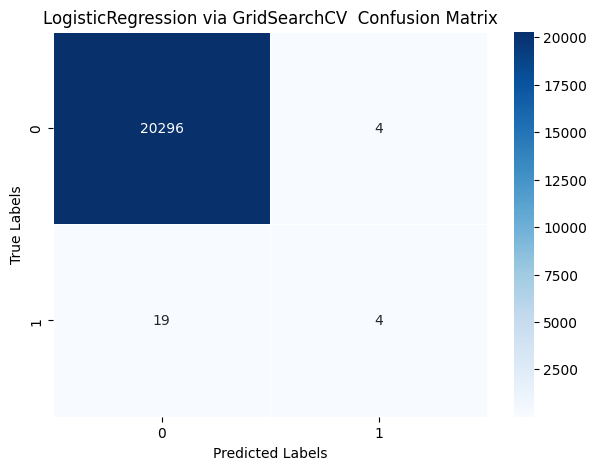

Current Timestamp:  2024-04-12 16:59:51.104671


In [52]:
plot_confusion_matrix(y_test, y_pred_log_reg_grid, "LogisticRegression via GridSearchCV ")
print_timestamp()

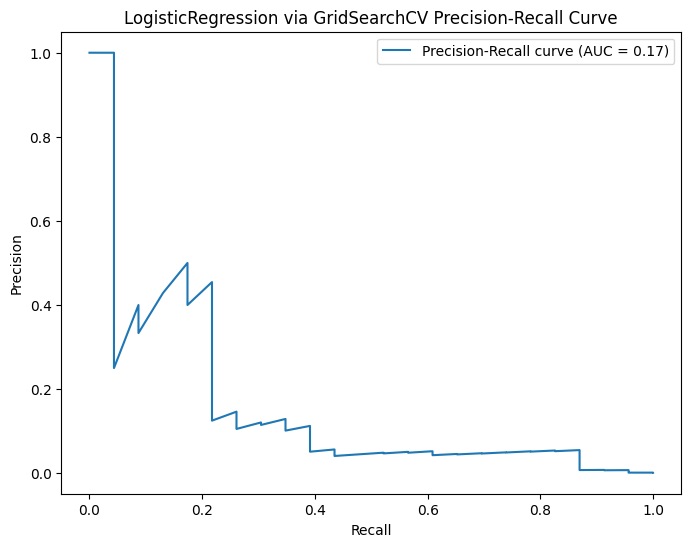

Current Timestamp:  2024-04-12 16:59:51.411110


In [53]:
plot_precision_recall_curve(grid_search, X_test, y_test,"LogisticRegression via GridSearchCV")

#plot_simplified_precision_recall_curve(precision, recall, pr_auc_score,"LogisticRegression via GridSearchCV")
print_timestamp()

[Back to top](#Index:)

<a id='part7'></a>

## Part 7 - Advanced Modeling and Hyperparameter Tuning

Focuses on advanced modeling techniques and hyperparameter tuning using methods like RandonizedSearchCV and BayesSearchCV to improve model performance. This section can include multiple models and their evaluations.


## <span style="font-size: 48px; color: blue;"><strong>RandomForestClassifier (RandomSearchCV)</strong></span>



In [54]:
from scipy.stats import randint

# Define broad parameter distribution
param_dist = {
    'n_estimators': randint(10, 400),
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'max_leaf_nodes': [None, 10, 20, 30],
    'min_impurity_decrease': [0.0, 0.1, 0.2],
    'bootstrap': [True, False]
}

# Initialize the RandomForestClassifier
rfc_rscv = RandomForestClassifier(random_state=0)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rfc_rscv,
    param_distributions=param_dist,
    n_iter=100,
    cv=5,
    n_jobs=-1,
    scoring='recall',
    verbose=2,
    random_state=42
)

start_time = time.time()

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

end_time = time.time()
execution_time = end_time - start_time

# Retrieve the best hyperparameters
best_params_rs = random_search.best_params_
print("Best hyperparameters:", best_params_rs)

# Evaluate the best model on the validation set
best_model = random_search.best_estimator_
y_val_pred = best_model.predict(X_val)

# Print classification report for the validation set
print("Validation set classification report:")
print(classification_report(y_val, y_val_pred))

# Combine training and validation sets for final model training
X_train_val = np.vstack((X_train, X_val))
y_train_val = np.concatenate((y_train, y_val))

# Initialize a new RandomForestClassifier using the best hyperparameters found
best_rfc_rscv = RandomForestClassifier(**best_params_rs, random_state=42)

# Fit the final model to the combined training and validation data
best_rfc_rscv.fit(X_train_val, y_train_val)

# Make predictions with the trained model
y_pred_randomforest_randomsearch = best_rfc_rscv.predict(X_test)

# Print the model accuracy
print(f'Model Accuracy score: {round(accuracy_score(y_pred_randomforest_randomsearch, y_test) * 100, 2)}%')

# Print the best parameters
print("Best parameters found: ", random_search.best_params_)

print_timestamp()

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best hyperparameters: {'bootstrap': False, 'max_depth': 13, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 336}
Validation set classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16239
           1       1.00      0.42      0.59        19

    accuracy                           1.00     16258
   macro avg       1.00      0.71      0.80     16258
weighted avg       1.00      1.00      1.00     16258



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Model Accuracy score: 99.93%
Best parameters found:  {'bootstrap': False, 'max_depth': 13, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 336}
Current Timestamp:  2024-04-12 17:37:49.077729


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


                                Model  Accuracy (%)  Precision  Recall  \
0  Logistic Regression (GridSearchCV)         99.89        1.0     1.0   
1   RandomForest (RandomizedSearchCV)         99.93        1.0     1.0   

   F1-Score  PR AUC  ROC AUC    Exec Time  
0       1.0    0.17     0.95  1164.507737  
1       1.0    0.76     0.96  2086.674055  


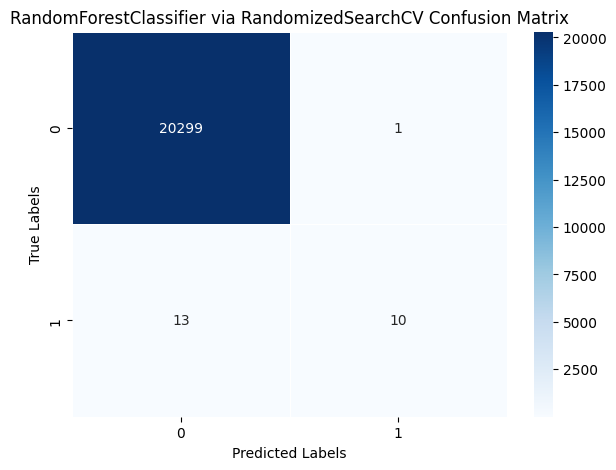

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20300
           1       0.91      0.43      0.59        23

    accuracy                           1.00     20323
   macro avg       0.95      0.72      0.79     20323
weighted avg       1.00      1.00      1.00     20323



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


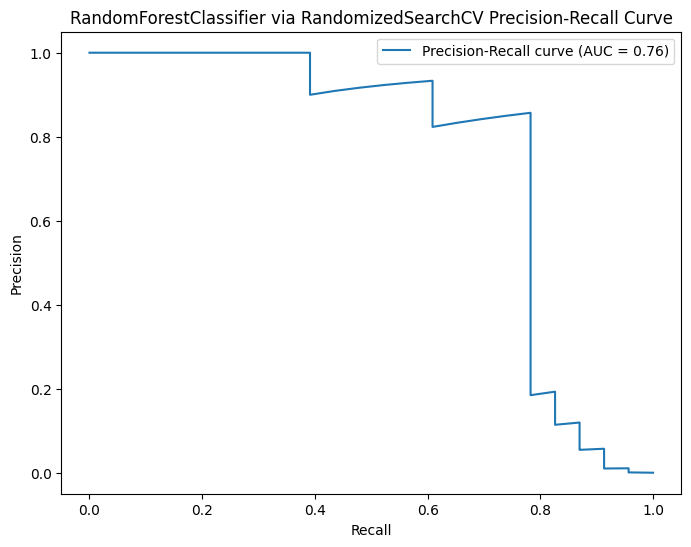

In [55]:
# Generate probability predictions for the positive class
y_pred_prob = best_rfc_rscv.predict_proba(X_test)[:, 1]

model_performance_df, precision_recall_thresholds = add_model_performance(
    model_name='RandomForest (RandomizedSearchCV)',
    y_true=y_test,
    y_pred=y_pred_randomforest_randomsearch,
    y_pred_prob=y_pred_prob,
    df_performance=model_performance_df,
    thresholds=precision_recall_thresholds,
    exec_time=execution_time
)


# Display the updated DataFrame
print(model_performance_df)

# Plot the confusion matrix to check the true positive and false positive visa versa for Using RandomizedSearchCV with RandomForestClassifier
plot_confusion_matrix(y_test, y_pred_randomforest_randomsearch,"RandomForestClassifier via RandomizedSearchCV")

print(classification_report(y_test, y_pred_randomforest_randomsearch))

plot_precision_recall_curve(best_rfc_rscv, X_test, y_test,"RandomForestClassifier via RandomizedSearchCV")


In [ ]:
from joblib import dump
# Save the model using joblib for persistence
dump(best_rfc_rscv, '/content/gdrive/My Drive/Pythoncode/CProject/rfc_rscv_model.joblib')

['/content/gdrive/My Drive/Pythoncode/CProject/rfc_rscv_model.joblib']

## RandomForestClassifier (BayesSearchCV)

The RandomForestClassifier is an ensemble learning method that combines multiple decision trees to improve classification accuracy and prevent overfitting, making it robust against the complex and imbalanced nature of fraud detection datasets. Its ability to handle large datasets with numerous features allows for effectively capturing the nuances of fraudulent transactions. Additionally, RandomForestClassifier offers insights into feature importance, aiding in the identification of key indicators of fraud and enhancing model interpretability.

In [ ]:
# Based on the last run
from skopt.space import Integer, Real

from collections import OrderedDict

# Given best hyperparameters in an OrderedDict
best_params_bs_previous = OrderedDict([
    ('max_depth', 11),
    ('min_samples_leaf', 1),
    ('min_samples_split', 10),
    ('n_estimators', 143)
])


 #Assign these hyperparameters to a RandomForestClassifier
bs_best_model_previous = RandomForestClassifier(
    n_estimators=best_params_bs_previous['n_estimators'],
    max_depth=best_params_bs_previous['max_depth'],
    min_samples_split=best_params_bs_previous['min_samples_split'],
    min_samples_leaf=best_params_bs_previous['min_samples_leaf'],
    random_state=42  # for reproducibility, you can set this as needed
)


# Now, fit the classifier to your data

bs_best_model_previous.fit(X_train, y_train)

# Calculate PR AUC for the previous model
y_val_prob_previous = bs_best_model_previous.predict_proba(X_val)[:, 1]  # assuming positive class is at index 1
pr_auc_bs_previous = average_precision_score(y_val, y_val_prob_previous)

print("Validation PR AUC from the previous search:", pr_auc_bs_previous)

print_timestamp()

Validation PR AUC from the previous search: 0.5840149786630546


In [ ]:
# if random search find good parameters
from skopt.space import Integer, Real

#using BayesSearchCV
# Define a narrower search space based on the best parameters found
param_space_rs = {
    'n_estimators': Integer(best_params_rs['n_estimators'] - 50, best_params_rs['n_estimators'] + 50),
    'max_depth': Integer(max(1, best_params_rs['max_depth'] - 5), best_params_rs['max_depth'] + 5),
    'min_samples_split': Integer(max(2, best_params_rs['min_samples_split'] - 2), best_params_rs['min_samples_split'] + 2),
    'min_samples_leaf': Integer(max(1, best_params_rs['min_samples_leaf'] - 3), best_params_rs['min_samples_leaf'] + 3),
}

rfc=RandomForestClassifier(random_state=42)

bayes_search_rs = BayesSearchCV(
    rfc,
    param_space_rs,
    n_iter=50,            # Number of optimisation steps
    n_jobs=-1,            # Use all available cores for parallelisation
    cv=5,                 # Number of cross-validation folds
    random_state=42
)

start_time = time.time()

# Fit BayesSearchCV to the training data
bayes_search_rs.fit(X_train,y_train)

end_time = time.time()
execution_time = end_time - start_time

# Retrieve the best hyperparameters
best_params = bayes_search_rs.best_params_
print("Best hyperparameters:",best_params)

# Evaluate the best model on the validation set
bs_best_model_rs = bayes_search_rs.best_estimator_
y_val_pred = bs_best_model_rs.predict(X_val)

# Print classification report for the validation set
print("Validation set classification report:")
print(classification_report(y_val, y_val_pred))



Best hyperparameters: OrderedDict([('max_depth', 16), ('min_samples_leaf', 2), ('min_samples_split', 3), ('n_estimators', 366)])
Validation set classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16239
           1       0.80      0.21      0.33        19

    accuracy                           1.00     16258
   macro avg       0.90      0.61      0.67     16258
weighted avg       1.00      1.00      1.00     16258



In [ ]:
# Calculate PR AUC for the new model
y_val_prob_new = bs_best_model_rs.predict_proba(X_val)[:, 1]  # assuming positive class is at index 1
pr_auc_new = average_precision_score(y_val, y_val_prob_new)
print("Validation PR AUC from the new search:", pr_auc_new)

Validation PR AUC from the new search: 0.5656140040540983


In [ ]:


# Compare the PR AUC values to determine the better model
if pr_auc_new > pr_auc_bs_previous:
    print("The new search space yielded a better model.")
    rfc_bayes = bs_best_model_rs
else:
    print("The original search space yielded a better model.")
    rfc_bayes = bs_best_model_previous



# Combine training and validation sets for final model training
X_train_val = np.vstack((X_train, X_val))
y_train_val = np.concatenate((y_train, y_val))

# Initialize a new RandomForestClassifier using the best hyperparameters found
#rfc_bayes = RandomForestClassifier(**best_params, random_state=42)

# Fit the final model to the combined training and validation data
rfc_bayes.fit(X_train_val, y_train_val)

print_timestamp()

The original search space yielded a better model.
Current Timestamp:  2024-04-12 15:51:11.547845


### first time to use BaySearchCV

In [56]:
#using BayesSearchCV
param_space = {
    'n_estimators': (10,200),        # Number of trees in the forest
    'max_depth': (1,20),             # Maximum depth of the tree
    'min_samples_split': (2,10),      # Minimun number of samples required to split an internal code
    'min_samples_leaf': (1,10),       # Minimum number of samples required to be at a leaf node
}

rfc=RandomForestClassifier(random_state=42)

bayes_search = BayesSearchCV(
    rfc,
    param_space,
    n_iter=50,            # Number of optimisation steps
    n_jobs=-1,            # Use all available cores for parallelisation
    cv=5,                 # Number of cross-validation folds
    random_state=42
)

# Fit BayesSearchCV to the training data
bayes_search.fit(X_train,y_train)

# Retrieve the best hyperparameters
best_params = bayes_search.best_params_
print("Best hyperparameters:",best_params)

# Evaluate the best model on the validation set
best_model = bayes_search.best_estimator_
y_val_pred = best_model.predict(X_val)

# Print classification report for the validation set
print("Validation set classification report:")
print(classification_report(y_val, y_val_pred))

# Combine training and validation sets for final model training
X_train_val = np.vstack((X_train, X_val))
y_train_val = np.concatenate((y_train, y_val))

# Initialize a new RandomForestClassifier using the best hyperparameters found
rfc_bayes = RandomForestClassifier(**best_params, random_state=42)

# Fit the final model to the combined training and validation data
rfc_bayes.fit(X_train_val, y_train_val)

print_timestamp()

Best hyperparameters: OrderedDict([('max_depth', 16), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 136)])
Validation set classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16239
           1       1.00      0.37      0.54        19

    accuracy                           1.00     16258
   macro avg       1.00      0.68      0.77     16258
weighted avg       1.00      1.00      1.00     16258

Current Timestamp:  2024-04-12 17:56:26.569201


In [57]:
# Prediction with RandomForestClassifier
y_pred_randomforest_bayessearch=rfc_bayes.predict(X_test)
y_pred_prob = rfc_bayes.predict_proba(X_test)[:, 1]  # probabilities of positive class

# adding performance metrics into model_performance_df
model_performance_df, precision_recall_thresholds = add_model_performance(
    model_name='RandomForest (BayesSearchCV)',
    y_true=y_test,
    y_pred=y_pred_randomforest_bayessearch,
    y_pred_prob=y_pred_prob,
    df_performance=model_performance_df,
    thresholds=precision_recall_thresholds,
    exec_time=execution_time
)

# Display the updated DataFrame
print(model_performance_df)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


                                Model  Accuracy (%)  Precision  Recall  \
0  Logistic Regression (GridSearchCV)         99.89        1.0     1.0   
1   RandomForest (RandomizedSearchCV)         99.93        1.0     1.0   
2        RandomForest (BayesSearchCV)         99.94        1.0     1.0   

   F1-Score  PR AUC  ROC AUC    Exec Time  
0       1.0    0.17     0.95  1164.507737  
1       1.0    0.76     0.96  2086.674055  
2       1.0    0.77     0.95  2086.674055  


In [58]:
print(f'Model Accuracy score: {round(accuracy_score(y_pred_randomforest_bayessearch,y_test)*100,2)}%')

print_timestamp()

Model Accuracy score: 99.94%
Current Timestamp:  2024-04-12 17:56:27.079706


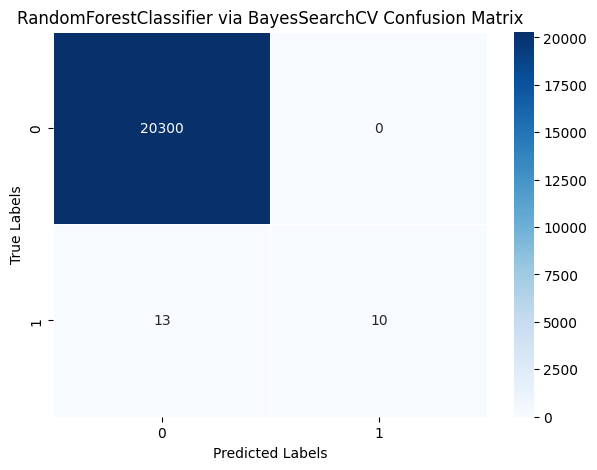

Current Timestamp:  2024-04-12 17:56:27.367360


In [59]:
# Plot the confusion matrix to check the true positive and false positive visa versa for Using BayesSearchCV with RandomForestClassifier

plot_confusion_matrix(y_test, y_pred_randomforest_bayessearch, "RandomForestClassifier via BayesSearchCV")
print_timestamp()


In [60]:
print(classification_report(y_test, y_pred_randomforest_bayessearch))
print_timestamp()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20300
           1       1.00      0.43      0.61        23

    accuracy                           1.00     20323
   macro avg       1.00      0.72      0.80     20323
weighted avg       1.00      1.00      1.00     20323

Current Timestamp:  2024-04-12 17:56:27.420661


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


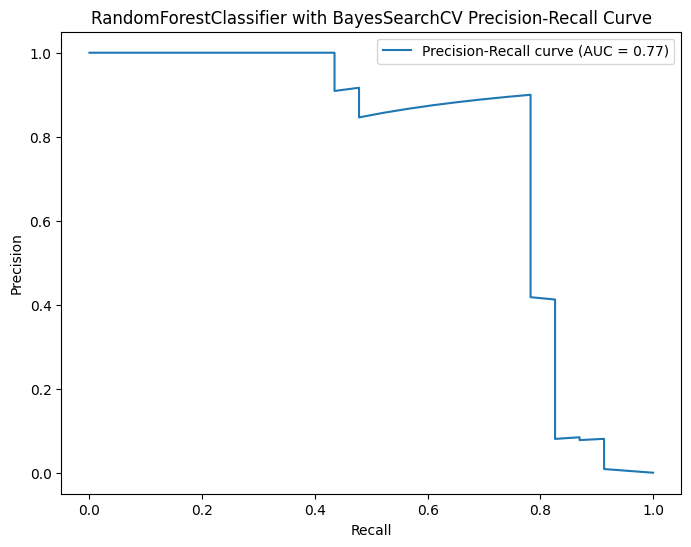

Current Timestamp:  2024-04-12 17:56:27.926441


In [61]:
plot_precision_recall_curve(rfc_bayes, X_test, y_test, "RandomForestClassifier with BayesSearchCV")
print_timestamp()

In [ ]:
from joblib import dump
# Save the model using joblib for persistence
dump(rfc_bayes, '/content/gdrive/My Drive/Pythoncode/CProject/rfc_bayes_model.joblib')

['/content/gdrive/My Drive/Pythoncode/CProject/rfc_bayes_model.joblib']

## Test with Balanced Dataset

In [62]:
# Load balanced dataset
df_balanced = pd.read_csv('https://raw.githubusercontent.com/jdchen5/imperialMLnAI_CSproject/main/data/balanced_fraud_ds.csv')

print(f'The Data consist:\n Total Rows: {df_balanced.shape[0]}\n Total columns: {df_balanced.shape[1]}')
print(df_balanced.head())
print(f'Total missing value in Percentage: \n {round(df_balanced.isnull().sum()/df_balanced.shape[0],2)}')
print(f"Percentage of fraud to total samples: {round((df_balanced[df_balanced['isFraud'] == 1].shape[0] / df_balanced.shape[0]) * 100, 2)}%")
print(f"\nPercentage of fraud flagged to total samples: {round((df_balanced[df_balanced['isFlaggedFraud'] == 1].shape[0] / df_balanced.shape[0]) * 100, 2)}%")
#Drop the columns based on the hypothesis testing
df1_balanced=df_balanced.drop(['nameOrig'],axis=1)
df1_balanced.select_dtypes(include='object').columns

for col in df1_balanced.select_dtypes(include=['object']).columns:
    df1_balanced[col] = replace_with_percentage(df1_balanced[col])

X_balanced = df1_balanced.drop('isFraud',axis=1)
y_balanced = df1_balanced.isFraud

print(f"Number of samples in X_balanced: {X_balanced.shape[0]}")
print(f"Number of labels in y_balanced: {len(y_balanced)}")


# Split the data into training and testing sets with stratification
# This ensures that the proportion of classes in both splits will be the same as in the entire dataset
X_balanced_train,X_balanced_test,y_balanced_train,y_balanced_test=train_test_split(X_balanced, y_balanced,test_size=0.20,stratify=y_balanced, random_state=42)

print(f'Number of rows in the training features dataset: {X_balanced_train.shape[0]}')
print(f'Number of rows in the training lables dataset: {y_balanced_train.shape[0]}')
print(f'Number of rows in the testing features dataset: {X_balanced_test.shape[0]}')
print(f'Number of rows in the testing lables dataset: {y_balanced_test.shape[0]}')
print_timestamp()

The Data consist:
 Total Rows: 16426
 Total columns: 11
   step      type      amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0   397   CASH_IN    76550.74   C658247527     1096252.93      1172803.66   
1   251   PAYMENT    12617.11  C1812418129      339181.87       326564.76   
2     3  TRANSFER    22877.00  C1247938090       22877.00            0.00   
3   635  TRANSFER   182739.36  C1687063682      182739.36            0.00   
4   157  CASH_OUT  4738282.28   C751624512     4738282.28            0.00   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0   C492670573      2208784.02      2132233.28        0               0  
1  M1924423059            0.00            0.00        0               0  
2  C1002031672            0.00            0.00        1               0  
3   C451391923            0.00            0.00        1               0  
4   C320991755            0.00      4738282.28        1               0  
Total missing value in Percentage: 
 

In [63]:
start_time = time.time()

# Fit the final model to the balanced training data
rfc_bayes.fit(X_balanced_train, y_balanced_train)

end_time = time.time()
execution_time = end_time - start_time

# Prediction with RandomForestClassifier
y_pred_randomforest_bayessearch_balanced=rfc_bayes.predict(X_balanced_test)
y_pred_prob = rfc_bayes.predict_proba(X_balanced_test)[:, 1]  # probabilities of positive class

# adding performance metrics into model_performance_df
model_performance_df, precision_recall_thresholds = add_model_performance(
    model_name='RandomForest (BayesSearchCV) - balanced',
    y_true=y_balanced_test,
    y_pred=y_pred_randomforest_bayessearch_balanced,
    y_pred_prob=y_pred_prob,
    df_performance=model_performance_df,
    thresholds=precision_recall_thresholds,
    exec_time=execution_time
)

# Display the updated DataFrame
print(model_performance_df)

print_timestamp()

                                     Model  Accuracy (%)  Precision  Recall  \
0       Logistic Regression (GridSearchCV)         99.89       1.00    1.00   
1        RandomForest (RandomizedSearchCV)         99.93       1.00    1.00   
2             RandomForest (BayesSearchCV)         99.94       1.00    1.00   
3  RandomForest (BayesSearchCV) - balanced         93.09       0.93    0.93   

   F1-Score  PR AUC  ROC AUC    Exec Time  
0      1.00    0.17     0.95  1164.507737  
1      1.00    0.76     0.96  2086.674055  
2      1.00    0.77     0.95  2086.674055  
3      0.93    0.98     0.98     1.721433  
Current Timestamp:  2024-04-12 17:56:30.169786


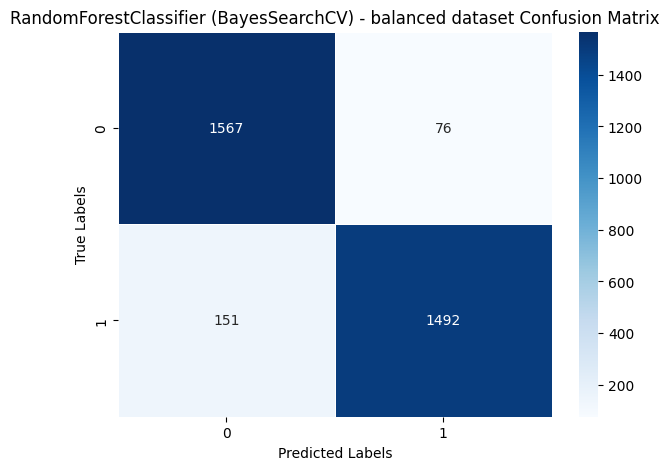

Current Timestamp:  2024-04-12 17:56:30.431330


In [64]:
# Plot the confusion matrix to check the true positive and false positive visa versa for Using BayesSearchCV with RandomForestClassifier

plot_confusion_matrix(y_balanced_test, y_pred_randomforest_bayessearch_balanced, "RandomForestClassifier (BayesSearchCV) - balanced dataset")
print_timestamp()

## DecisionTreeClassifier via GridSearchCV

Decision trees are a type of supervised learning algorithm that models decisions and their possible consequences, including chance event outcomes, resource costs, and utility, by splitting data into branches based on feature values. They excel in fraud detection because they can handle complex, non-linear relationships between features and outcomes, making it easier to identify fraudulent activities through clear, interpretable decision rules. Furthermore, their ability to work with both numerical and categorical data allows for comprehensive analysis of transactional data, critical for spotting unusual patterns indicative of fraud.

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
param_grid = {
    "max_depth": [3, 4, 5, 6, 7, 8],
    "min_samples_split": [2, 3, 4],
    "min_samples_leaf": [1, 2, 3, 4],
    "random_state": [0, 42]
}

# Create a DecisionTreeClassifier with 'balanced' class weight
decision_tree = DecisionTreeClassifier(class_weight='balanced')

# Create a GridSearchCV object with the DecisionTreeClassifier
grid_search = GridSearchCV(decision_tree, param_grid, cv=5)

start_time = time.time()

# Fit the GridSearchCV object with training data
grid_search.fit(X_train, y_train)

end_time = time.time()
execution_time = end_time - start_time

# Print the best parameters found by GridSearchCV
best_params = grid_search.best_params_
print("Best parameters found:", best_params)

# Evaluate the model with best parameters on the validation set
best_model = grid_search.best_estimator_
val_pred = best_model.predict(X_val)
print(f'Validation Accuracy score: {round(accuracy_score(y_val, val_pred) * 100, 2)}%')

# Combine the training and validation datasets for final model training
X_train_val = np.vstack([X_train, X_val])
y_train_val = np.concatenate([y_train, y_val])

# Create a DecisionTreeClassifier with the best parameters found
d_tree = DecisionTreeClassifier(**best_params)

# Fit the DecisionTreeClassifier with training data
d_tree.fit(X_train_val, y_train_val)

# Make predictions with the trained Decision Tree model
d_tree_pred = d_tree.predict(X_test)

# Print the model accuracy
print(f'Model Accuracy score:{round(accuracy_score(d_tree_pred, y_test) * 100, 2)}%')

print_timestamp()

Best parameters found: {'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 2, 'random_state': 42}
Validation Accuracy score: 99.3%
Model Accuracy score:99.9%
Current Timestamp:  2024-04-12 17:58:15.534966


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [67]:
# Generate probability predictions for the positive class
y_pred_prob = d_tree.predict_proba(X_test)[:, 1]

# adding performance metrics into model_performance_df
model_performance_df, precision_recall_thresholds = add_model_performance(
    model_name='DecisionTree (GridSearchCV)',
    y_true=y_test,
    y_pred=d_tree_pred,
    y_pred_prob=y_pred_prob,
    df_performance=model_performance_df,
    thresholds=precision_recall_thresholds,
    exec_time=execution_time
)

# Display the updated DataFrame
print(model_performance_df)

                                     Model  Accuracy (%)  Precision  Recall  \
0       Logistic Regression (GridSearchCV)         99.89       1.00    1.00   
1        RandomForest (RandomizedSearchCV)         99.93       1.00    1.00   
2             RandomForest (BayesSearchCV)         99.94       1.00    1.00   
3  RandomForest (BayesSearchCV) - balanced         93.09       0.93    0.93   
4              DecisionTree (GridSearchCV)         99.90       1.00    1.00   

   F1-Score  PR AUC  ROC AUC    Exec Time  
0      1.00    0.17     0.95  1164.507737  
1      1.00    0.76     0.96  2086.674055  
2      1.00    0.77     0.95  2086.674055  
3      0.93    0.98     0.98     1.721433  
4      1.00    0.35     0.94   104.723246  


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


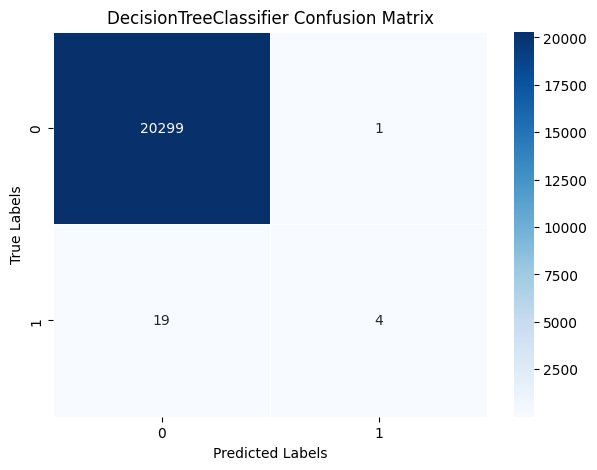

Current Timestamp:  2024-04-12 17:58:15.855940


In [68]:
plot_confusion_matrix(y_test, d_tree_pred,"DecisionTreeClassifier")
print_timestamp()

In [69]:
print(classification_report(y_test, d_tree_pred))

print_timestamp()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20300
           1       0.80      0.17      0.29        23

    accuracy                           1.00     20323
   macro avg       0.90      0.59      0.64     20323
weighted avg       1.00      1.00      1.00     20323

Current Timestamp:  2024-04-12 17:58:15.910980


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


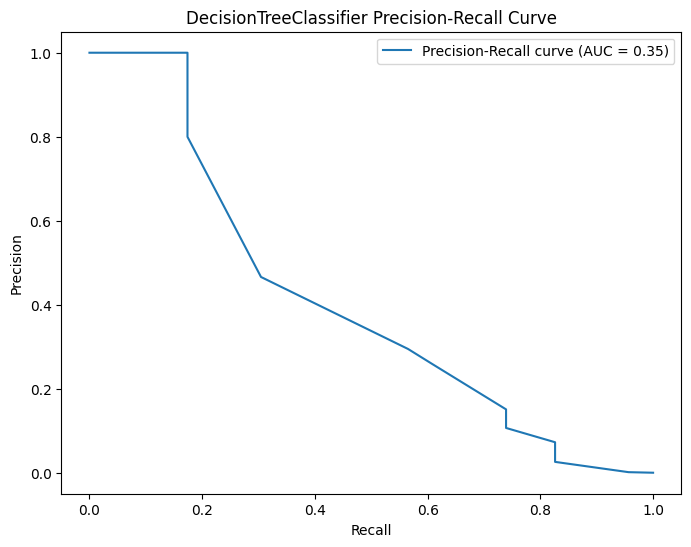

Current Timestamp:  2024-04-12 17:58:16.354093


In [70]:
plot_precision_recall_curve(d_tree, X_test, y_test,"DecisionTreeClassifier")

print_timestamp()

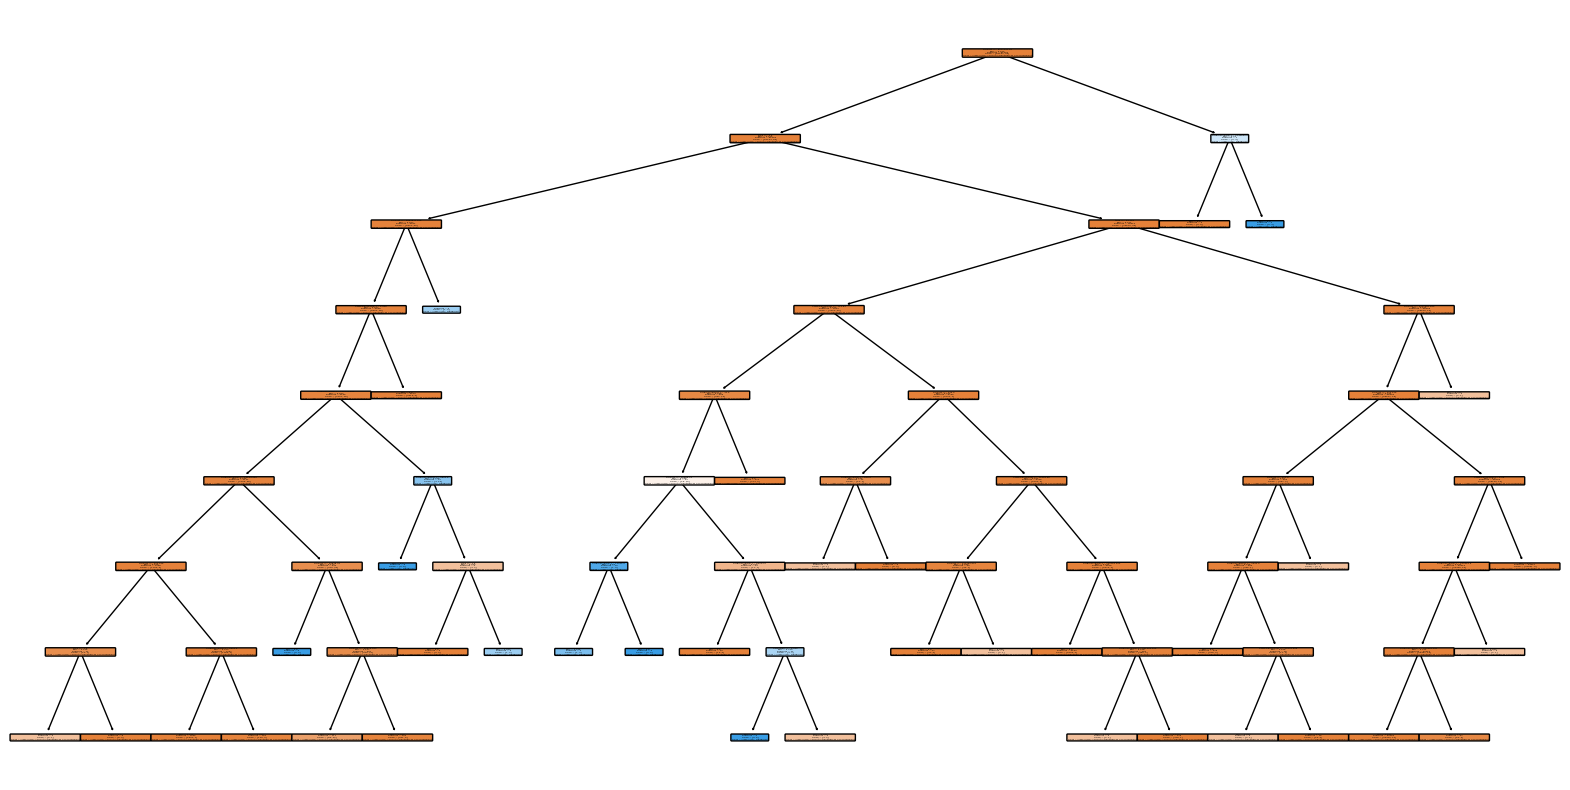

Current Timestamp:  2024-04-12 17:58:18.782011


In [71]:
from sklearn.tree import  plot_tree

# Assuming the DecisionTreeClassifier is named 'd_tree' and is already fitted
# For example: d_tree = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)

plt.figure(figsize=(20,10))
plot_tree(d_tree, filled=True, feature_names=X_train.columns, class_names=['class 0(TN): correctly identified as non-fraudulent', 'class 1(TP): fraudulent'], rounded=True)
plt.show()

print_timestamp()

In [73]:
# Check the features importance using rfc
imp_fea = pd.DataFrame({'Feature_name': X_train.columns, 'importance': best_rfc_rscv.feature_importances_})
imp_fea = imp_fea.sort_values(by='importance', ascending=False)


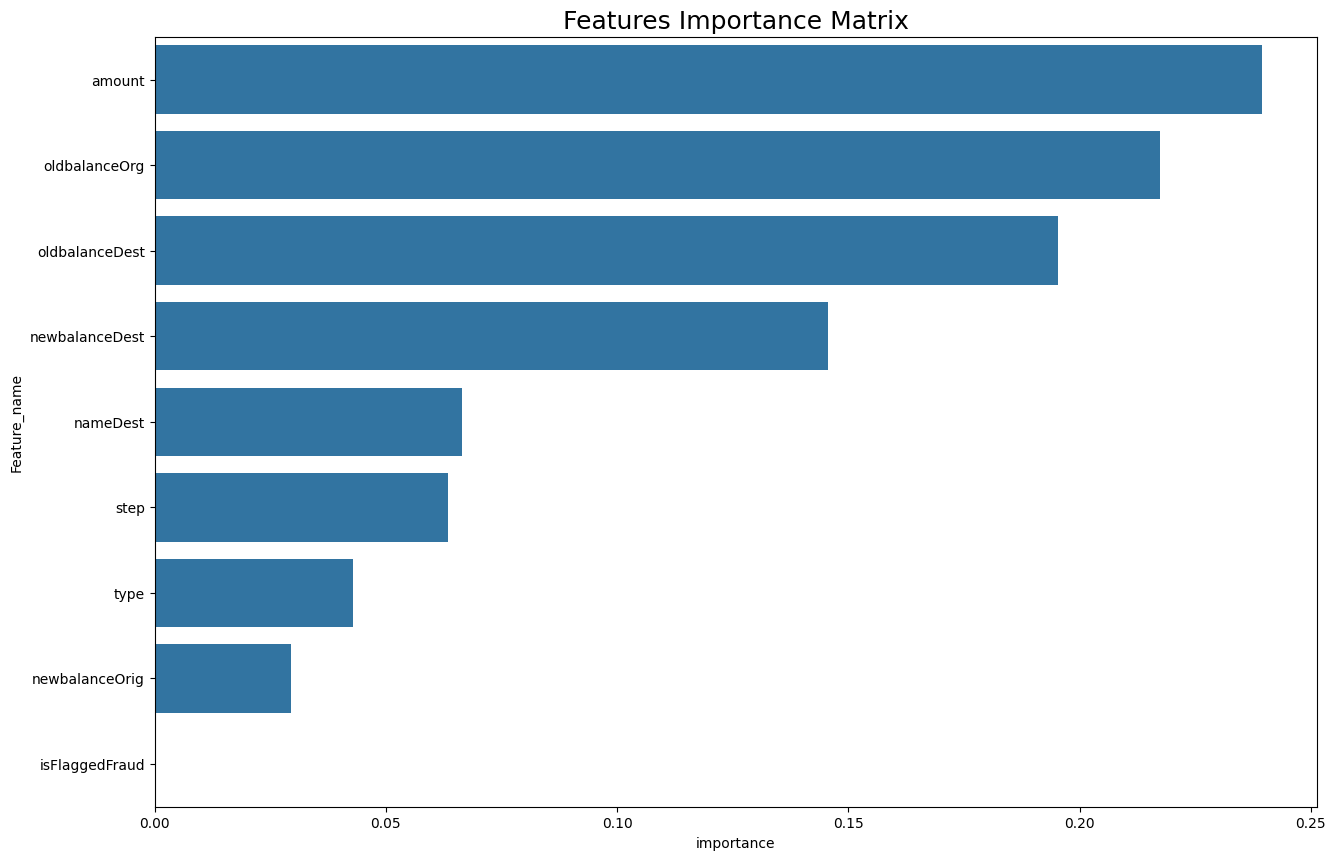

Current Timestamp:  2024-04-12 18:12:23.634648


In [74]:
# Plot the features importance matrix
fe1 = imp_fea.head(10)
plt.figure(figsize=(15,10))
sns.barplot(data=fe1, x="importance", y="Feature_name")
plt.title("Features Importance Matrix", fontsize=18)
plt.show()
print_timestamp()

## Model stacking and boosting

Model stacking combines multiple classification via a meta-learner, enhancing predictive performance by leveraging the strengths of each base model. It is particularly effective in complex scenarios like fraud detection, where diverse patterns may be captured better through a combination of different algorithms rather than relying on a single model approach. Stacking helps in reducing bias and variance, leading to more accurate and robust predictions, making it a powerful tool for identifying fraudulent activities with higher precision.

In [75]:
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier

# Define class weights for cost-sensitive learning
# Increase the weight of class 1 if it is the minority and more important class
class_weights = {0: 1, 1: 10}  # You may need to adjust the weights depending on your specific problem

# Define base learners with the best parameters found
base_learners = [
    ('rfc_bayes', RandomForestClassifier(
        n_estimators=194,
        max_depth=9,
        min_samples_split=3,
        min_samples_leaf=1,
        class_weight=class_weights,  # Add class weights here
        random_state=0
    )),  # Parameters based on BayesSearchCV results
    ('best_rfc2', RandomForestClassifier(  # will be renamed to rfc_grid
        n_estimators=100,
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        bootstrap=False,
        class_weight=class_weights,  # Add class weights here
        random_state=0
    ))  # Parameters based on GridSearchCV results
]

# Define the meta-learner with the best parameters found
meta_learner = LogisticRegression(
    C=1,
    penalty='l1',
    solver='liblinear',
    class_weight=class_weights  # Add class weights here
)

# Initialize StackingClassifier with multiple base learners and a meta learner
stacked_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=5
)

start_time = time.time()

# Fit the stacked model
stacked_model.fit(X_train, y_train)

# Evaluate on the validation set
y_val_pred = stacked_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

# Combine training and validation sets for the final model training
X_train_val = np.vstack([X_train, X_val])
y_train_val = np.concatenate([y_train, y_val])

# Re-fit the stacked model on the combined training and validation dataset
stacked_model.fit(X_train_val, y_train_val)

end_time = time.time()
execution_time = end_time - start_time

# Predict and evaluate on the test set
y_pred_stacked = stacked_model.predict(X_test)
stacked_model_accuracy = accuracy_score(y_test, y_pred_stacked)
print(f'Test Accuracy: {stacked_model_accuracy * 100:.2f}%')

print_timestamp()


Validation Accuracy: 99.90%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Test Accuracy: 99.90%
Current Timestamp:  2024-04-12 18:16:36.187392


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [76]:
# Print base learners' best parameters
print("Base learners' parameters:")
for name, model in stacked_model.estimators:
    print(f"\n{name}:")
    for param, value in model.get_params().items():
        print(f"  {param}: {value}")

# Print meta learner's best parameters
print("\nMeta-learner's parameters:")
for param, value in stacked_model.final_estimator_.get_params().items():
    print(f"  {param}: {value}")


Base learners' parameters:

rfc_bayes:
  bootstrap: True
  ccp_alpha: 0.0
  class_weight: {0: 1, 1: 10}
  criterion: gini
  max_depth: 9
  max_features: sqrt
  max_leaf_nodes: None
  max_samples: None
  min_impurity_decrease: 0.0
  min_samples_leaf: 1
  min_samples_split: 3
  min_weight_fraction_leaf: 0.0
  n_estimators: 194
  n_jobs: None
  oob_score: False
  random_state: 0
  verbose: 0
  warm_start: False

best_rfc2:
  bootstrap: False
  ccp_alpha: 0.0
  class_weight: {0: 1, 1: 10}
  criterion: gini
  max_depth: None
  max_features: sqrt
  max_leaf_nodes: None
  max_samples: None
  min_impurity_decrease: 0.0
  min_samples_leaf: 1
  min_samples_split: 2
  min_weight_fraction_leaf: 0.0
  n_estimators: 100
  n_jobs: None
  oob_score: False
  random_state: 0
  verbose: 0
  warm_start: False

Meta-learner's parameters:
  C: 1
  class_weight: {0: 1, 1: 10}
  dual: False
  fit_intercept: True
  intercept_scaling: 1
  l1_ratio: None
  max_iter: 100
  multi_class: auto
  n_jobs: None
  penal

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


                                     Model  Accuracy (%)  Precision  Recall  \
0       Logistic Regression (GridSearchCV)         99.89       1.00    1.00   
1        RandomForest (RandomizedSearchCV)         99.93       1.00    1.00   
2             RandomForest (BayesSearchCV)         99.94       1.00    1.00   
3  RandomForest (BayesSearchCV) - balanced         93.09       0.93    0.93   
4              DecisionTree (GridSearchCV)         99.90       1.00    1.00   
5                            Stacked Model         99.90       1.00    1.00   

   F1-Score  PR AUC  ROC AUC    Exec Time  
0      1.00    0.17     0.95  1164.507737  
1      1.00    0.76     0.96  2086.674055  
2      1.00    0.77     0.95  2086.674055  
3      0.93    0.98     0.98     1.721433  
4      1.00    0.35     0.94   104.723246  
5      1.00    0.67     0.96   247.918223  
Stacked Model Accuracy: 99.8967%


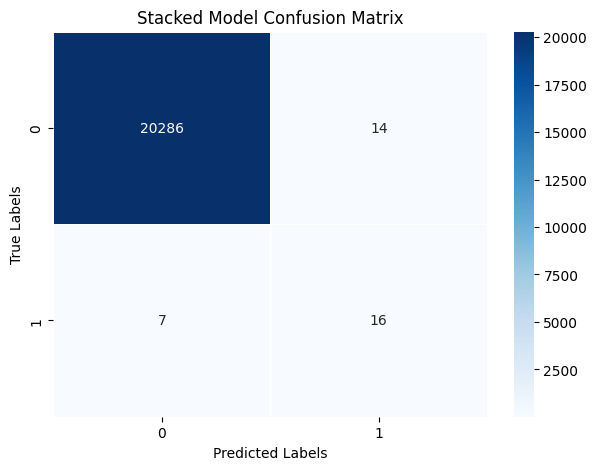

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20300
           1       0.53      0.70      0.60        23

    accuracy                           1.00     20323
   macro avg       0.77      0.85      0.80     20323
weighted avg       1.00      1.00      1.00     20323



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


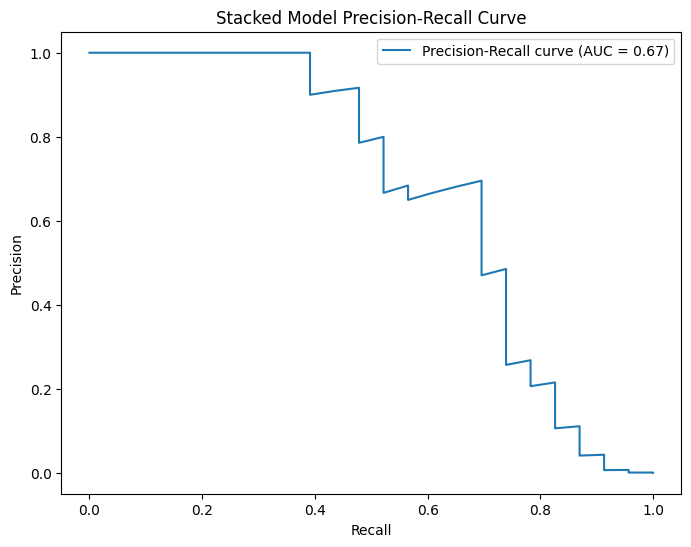

Current Timestamp:  2024-04-12 18:16:37.868660


In [77]:
# Generate probability predictions for the positive class
y_pred_prob = stacked_model.predict_proba(X_test)[:, 1]

model_performance_df, precision_recall_thresholds = add_model_performance(
    model_name='Stacked Model',
    y_true=y_test,
    y_pred=y_pred_stacked,
    y_pred_prob=y_pred_prob,
    df_performance=model_performance_df,
    thresholds=precision_recall_thresholds,
    exec_time=execution_time
)

# Display the updated DataFrame
print(model_performance_df)

print(f'Stacked Model Accuracy: {round(stacked_model_accuracy*100,4)}%')

plot_confusion_matrix(y_test, y_pred_stacked,"Stacked Model")
print(classification_report(y_test, y_pred_stacked))
plot_precision_recall_curve(stacked_model, X_test, y_test,"Stacked Model")

print_timestamp()


<span style="font-size: 40px; color: red;"><strong>Save the model to disk</strong></span>

In [ ]:
from joblib import dump
# Save the model using joblib for persistence
dump(stacked_model, '/content/gdrive/My Drive/Pythoncode/CProject/stacked_model.joblib')

['/content/gdrive/My Drive/Pythoncode/CProject/stacked_model.joblib']

[Back to top](#Index:)

<a id='part8'></a>

## Part 8 - Model Comparison and Selection

After training various models, this section is dedicated to comparing their performance, selecting the best model based on evaluation metrics, and possibly combining them through techniques like stacking or boosting.

### Model Performance Metrix

*   Accuracy (%): Measures the overall correctness of the model across all classes. In your case, all models have similar high accuracy, making it difficult to distinguish based on this metric alone.
*   Precision: Indicates how many of the instances predicted as positive are actually positive. A value of 1.0 across all models suggests that they all perform very well in this aspect.
*   Recall: Reflects the model's ability to detect all actual positives. Like Precision, a score of 1.0 for all models indicates excellent performance.
F1-Score: Balances Precision and Recall, providing a single metric to assess both. Since all models show an F1-Score of 1.0, they appear equally well-balanced between Precision and Recall.
*   AUC: Represents the model's ability to discriminate between positive and negative classes. Higher AUC values indicate better model performance, especially in cases where the classes are imbalanced.


| Model                                | Accuracy (%) | Precision | Recall | F1-Score | PR AUC | ROC AUC |
|--------------------------------------|--------------|-----------|--------|----------|--------|---------|
| Logistic Regression (GridSearchCV)   | 99.89        | 1         | 1      | 1        | 0.02   | 0.92    |
| RandomForest (BayesSearchCV)         | 99.93        | 1         | 1      | 1        | 0.6    | 0.96    |
| RandomForest (RandomizedSearchCV)    | 99.93        | 1         | 1      | 1        | 0.57   | 0.89    |
| DecisionTree (GridSearchCV)          | 99.91        | 1         | 1      | 1        | 0.43   | 0.88    |
| Stacked Model                        | 99.9         | 1         | 1      | 1        | 0.54   | 0.95    |


In [78]:
from IPython.display import display, Markdown

# Assuming model_performance_df is your DataFrame
display(Markdown(model_performance_df.to_markdown()))


|    | Model                                   |   Accuracy (%) |   Precision |   Recall |   F1-Score |   PR AUC |   ROC AUC |   Exec Time |
|---:|:----------------------------------------|---------------:|------------:|---------:|-----------:|---------:|----------:|------------:|
|  0 | Logistic Regression (GridSearchCV)      |          99.89 |        1    |     1    |       1    |     0.17 |      0.95 |  1164.51    |
|  1 | RandomForest (RandomizedSearchCV)       |          99.93 |        1    |     1    |       1    |     0.76 |      0.96 |  2086.67    |
|  2 | RandomForest (BayesSearchCV)            |          99.94 |        1    |     1    |       1    |     0.77 |      0.95 |  2086.67    |
|  3 | RandomForest (BayesSearchCV) - balanced |          93.09 |        0.93 |     0.93 |       0.93 |     0.98 |      0.98 |     1.72143 |
|  4 | DecisionTree (GridSearchCV)             |          99.9  |        1    |     1    |       1    |     0.35 |      0.94 |   104.723   |
|  5 | Stacked Model                           |          99.9  |        1    |     1    |       1    |     0.67 |      0.96 |   247.918   |

In [ ]:
#print(precision_recall_thresholds)

### Precision-Recall Curve Charts

Average Precision Score (AP) calculates the area under the precision-recall curve (PR AUC), which plots precision (positive predictive value) against recall (true positive rate) for different thresholds. Unlike the ROC curve, the precision-recall curve focuses more on the performance of the positive class, which is particularly useful for imbalanced datasets where positive cases are much less frequent.

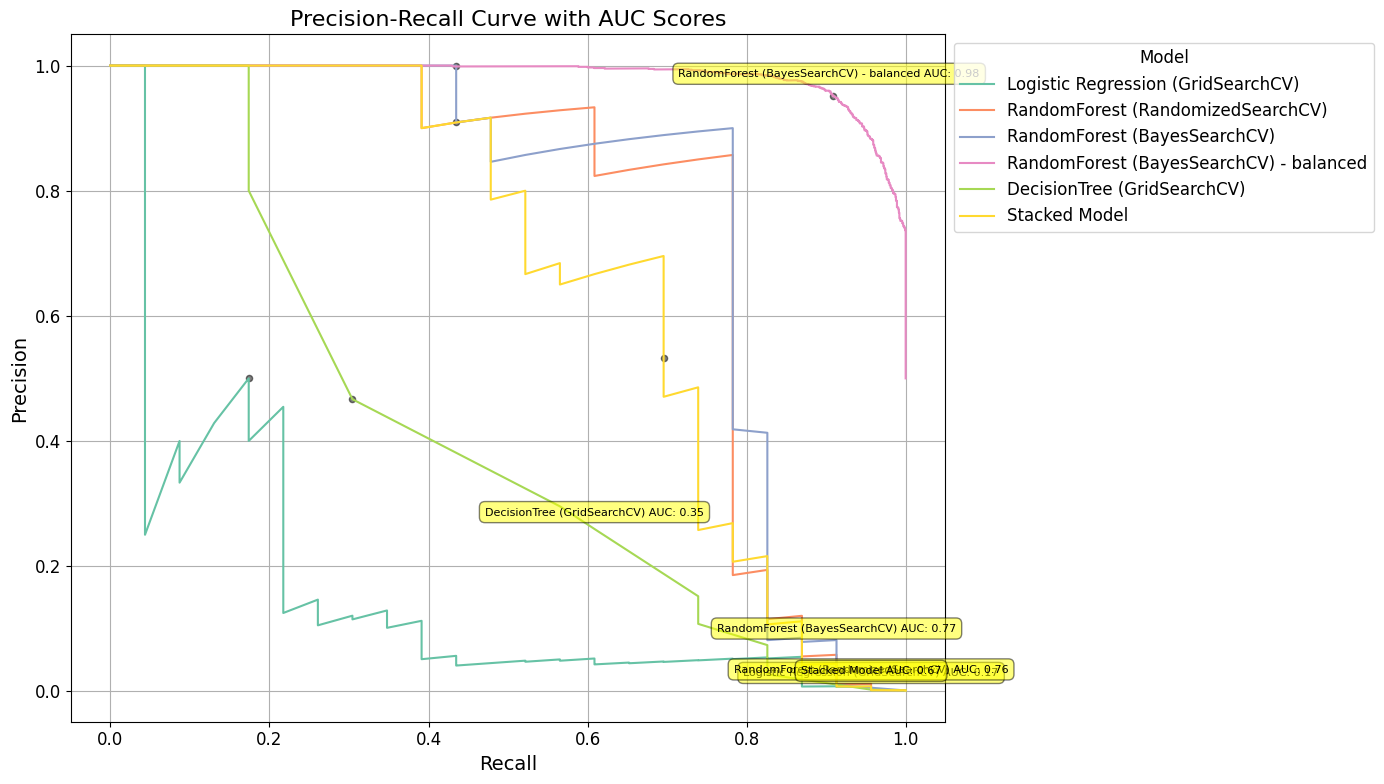

Current Timestamp:  2024-04-12 18:16:38.504980


In [79]:
# Set the size of the plot
plt.figure(figsize=(14, 8))

# Set font sizes
plt.rcParams.update({'font.size': 12, 'axes.labelsize': 14})

# precision_recall_thresholds is a dictionary containing precision, recall values for each model
# model_performance_df is a DataFrame containing performance metrics for each model

# Choose a color palette
colors = plt.get_cmap('Set2')

# Plot precision-recall curves for each model
for i, (model_name, metrics) in enumerate(precision_recall_thresholds.items()):
    plt.plot(metrics['recall'], metrics['precision'], label=f'{model_name}', color=colors(i))

# Annotate each curve with additional metrics from model_performance_df
# Position the text annotation to avoid overlap
for i, (index, row) in enumerate(model_performance_df.iterrows()):
    model_name = row['Model']
    auc_score = row['PR AUC']
    recall_val = precision_recall_thresholds[model_name]['recall']
    precision_val = precision_recall_thresholds[model_name]['precision']
    # Choose a point that's near the middle of the recall array
    mid_point = len(recall_val) // 2
    plt.annotate(f'{model_name} AUC: {auc_score:.2f}',
                 (recall_val[mid_point], precision_val[mid_point]),
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center', # horizontal alignment can be left, right or center
                 fontsize=8,
                 bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))

# Add gridlines
plt.grid(True)

# Add labels and title
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Precision-Recall Curve with AUC Scores', fontsize=16)

# Add the legend
plt.legend(title="Model", loc='upper left', fontsize=12, bbox_to_anchor=(1, 1))  # Legend outside

# Add smaller threshold markers with transparency
for model_name, metrics in precision_recall_thresholds.items():
    closest_threshold_index = np.argmin(np.abs(metrics['thresholds'] - 0.5))
    plt.scatter(metrics['recall'][closest_threshold_index], metrics['precision'][closest_threshold_index], s=20, color='black', alpha=0.5)

plt.tight_layout()  # Adjust layout

plt.show()

print_timestamp()

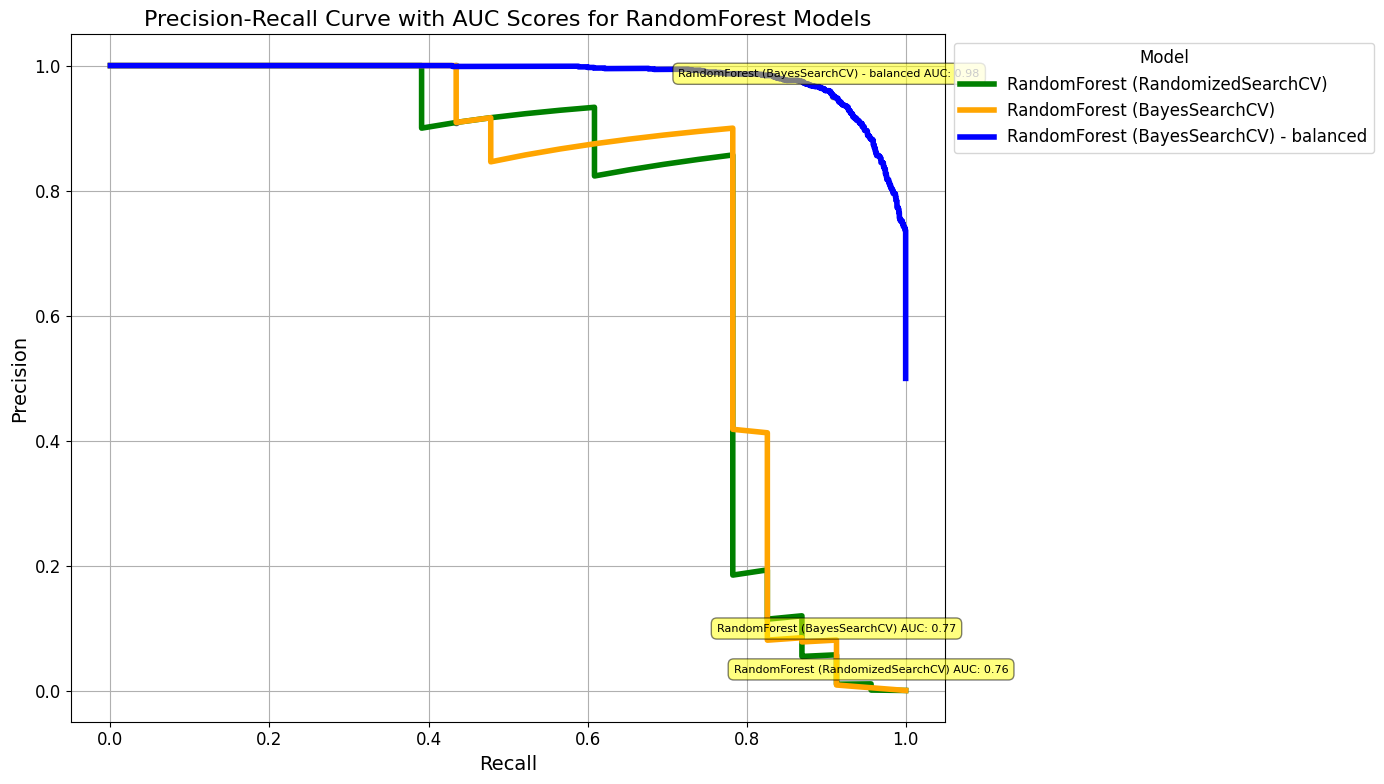

Current Timestamp:  2024-04-12 18:16:39.011476


In [80]:
# Set the size of the plot
plt.figure(figsize=(14, 8))

# Set font sizes
plt.rcParams.update({'font.size': 12, 'axes.labelsize': 14})

# precision_recall_thresholds is a dictionary containing precision, recall values for each model
# model_performance_df is a DataFrame containing performance metrics for each model

# Plot precision-recall curves only for RandomForest models
# Defining the colors for the models
colors = {'RandomForest (BayesSearchCV)': 'orange', 'RandomForest (RandomizedSearchCV)': 'green', 'RandomForest (BayesSearchCV) - balanced': 'blue'}

# Plot precision-recall curves only for RandomForest models
for i, (model_name, metrics) in enumerate(precision_recall_thresholds.items()):
    if "RandomForest" in model_name:
        plt.plot(metrics['recall'], metrics['precision'], label=f'{model_name}', color=colors[model_name], linewidth=4)

# Annotate each RandomForest curve with additional metrics from model_performance_df
# Position the text annotation to avoid overlap
for i, (index, row) in enumerate(model_performance_df.iterrows()):
    model_name = row['Model']
    if "RandomForest" in model_name:
        auc_score = row['PR AUC']
        recall_val = precision_recall_thresholds[model_name]['recall']
        precision_val = precision_recall_thresholds[model_name]['precision']
        # Choose a point that's near the middle of the recall array
        mid_point = len(recall_val) // 2
        plt.annotate(f'{model_name} AUC: {auc_score:.2f}',
                     (recall_val[mid_point], precision_val[mid_point]),
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center', # horizontal alignment can be left, right or center
                     fontsize=8,
                     bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))

# Add gridlines
plt.grid(True)

# Add labels and title
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Precision-Recall Curve with AUC Scores for RandomForest Models', fontsize=16)

# Add the legend
plt.legend(title="Model", loc='upper left', fontsize=12, bbox_to_anchor=(1, 1))  # Legend outside

# Add smaller threshold markers with transparency for RandomForest models
for model_name, metrics in precision_recall_thresholds.items():
    if "RandomForest" in model_name:
        closest_threshold_index = np.argmin(np.abs(metrics['thresholds'] - 0.5))
        plt.scatter(metrics['recall'][closest_threshold_index], metrics['precision'][closest_threshold_index], s=20, color='black', alpha=0.5)

plt.tight_layout()  # Adjust layout

plt.show()

print_timestamp()


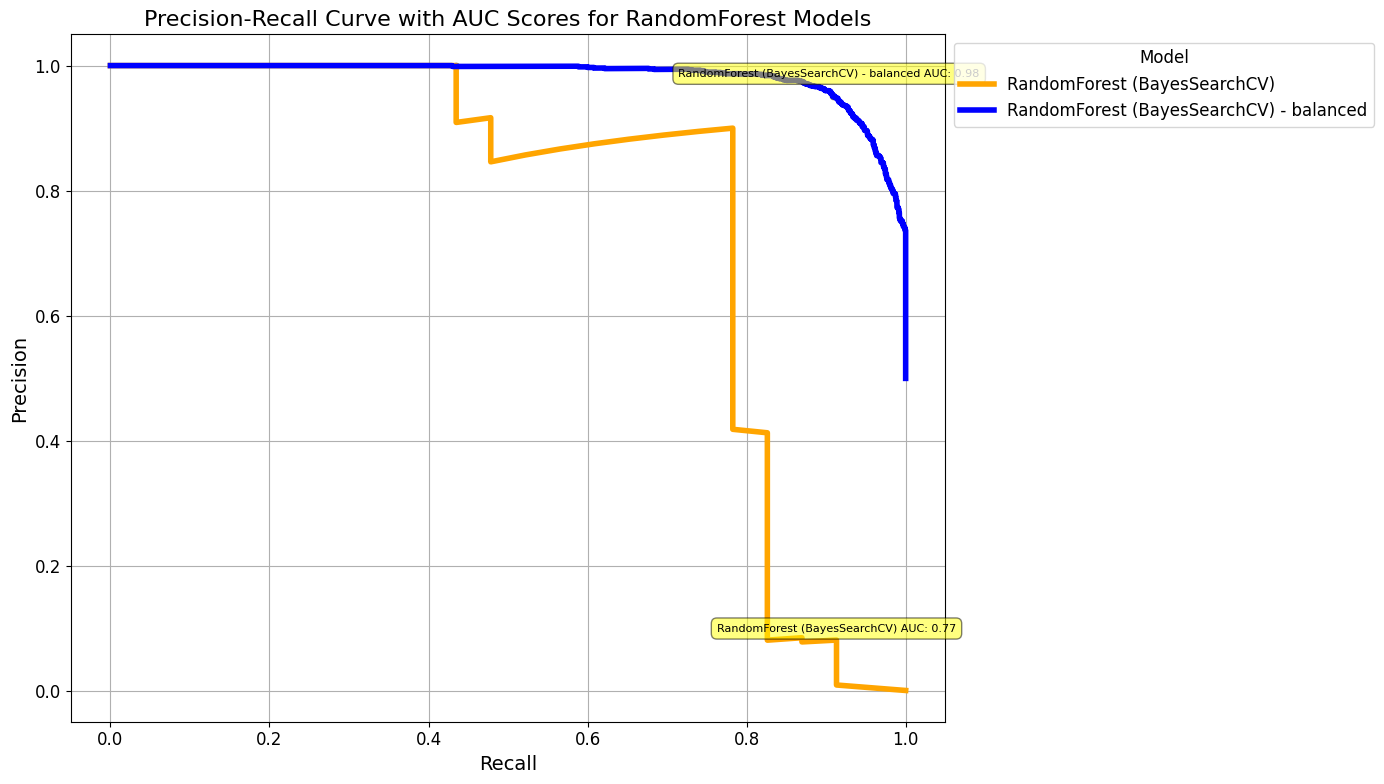

Current Timestamp:  2024-04-12 18:48:50.306438


In [83]:
# Set the size of the plot
plt.figure(figsize=(14, 8))

# Set font sizes
plt.rcParams.update({'font.size': 12, 'axes.labelsize': 14})

# precision_recall_thresholds is a dictionary containing precision, recall values for each model
# model_performance_df is a DataFrame containing performance metrics for each model

# Plot precision-recall curves only for RandomForest models
# Defining the colors for the models
colors = {'RandomForest (BayesSearchCV)': 'orange', 'RandomForest (BayesSearchCV) - balanced': 'blue'}

# Plot precision-recall curves only for RandomForest models
for i, (model_name, metrics) in enumerate(precision_recall_thresholds.items()):
    if "RandomForest (BayesSearchCV)" in model_name:
        plt.plot(metrics['recall'], metrics['precision'], label=f'{model_name}', color=colors[model_name], linewidth=4)

# Annotate each RandomForest curve with additional metrics from model_performance_df
# Position the text annotation to avoid overlap
for i, (index, row) in enumerate(model_performance_df.iterrows()):
    model_name = row['Model']
    if "RandomForest (BayesSearchCV)" in model_name:
        auc_score = row['PR AUC']
        recall_val = precision_recall_thresholds[model_name]['recall']
        precision_val = precision_recall_thresholds[model_name]['precision']
        # Choose a point that's near the middle of the recall array
        mid_point = len(recall_val) // 2
        plt.annotate(f'{model_name} AUC: {auc_score:.2f}',
                     (recall_val[mid_point], precision_val[mid_point]),
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center', # horizontal alignment can be left, right or center
                     fontsize=8,
                     bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))

# Add gridlines
plt.grid(True)

# Add labels and title
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Precision-Recall Curve with AUC Scores for RandomForest Models', fontsize=16)

# Add the legend
plt.legend(title="Model", loc='upper left', fontsize=12, bbox_to_anchor=(1, 1))  # Legend outside

# Add smaller threshold markers with transparency for RandomForest models
for model_name, metrics in precision_recall_thresholds.items():
    if "RandomForest (BayesSearchCV)" in model_name:
        closest_threshold_index = np.argmin(np.abs(metrics['thresholds'] - 0.5))
        plt.scatter(metrics['recall'][closest_threshold_index], metrics['precision'][closest_threshold_index], s=20, color='black', alpha=0.5)

plt.tight_layout()  # Adjust layout

plt.show()

print_timestamp()


### Confusion Matrix Plot Comparison

This creates a grid of confusion matrix plots for multiple models' predictions on a test set, allowing for easy comparison of their classification performance.

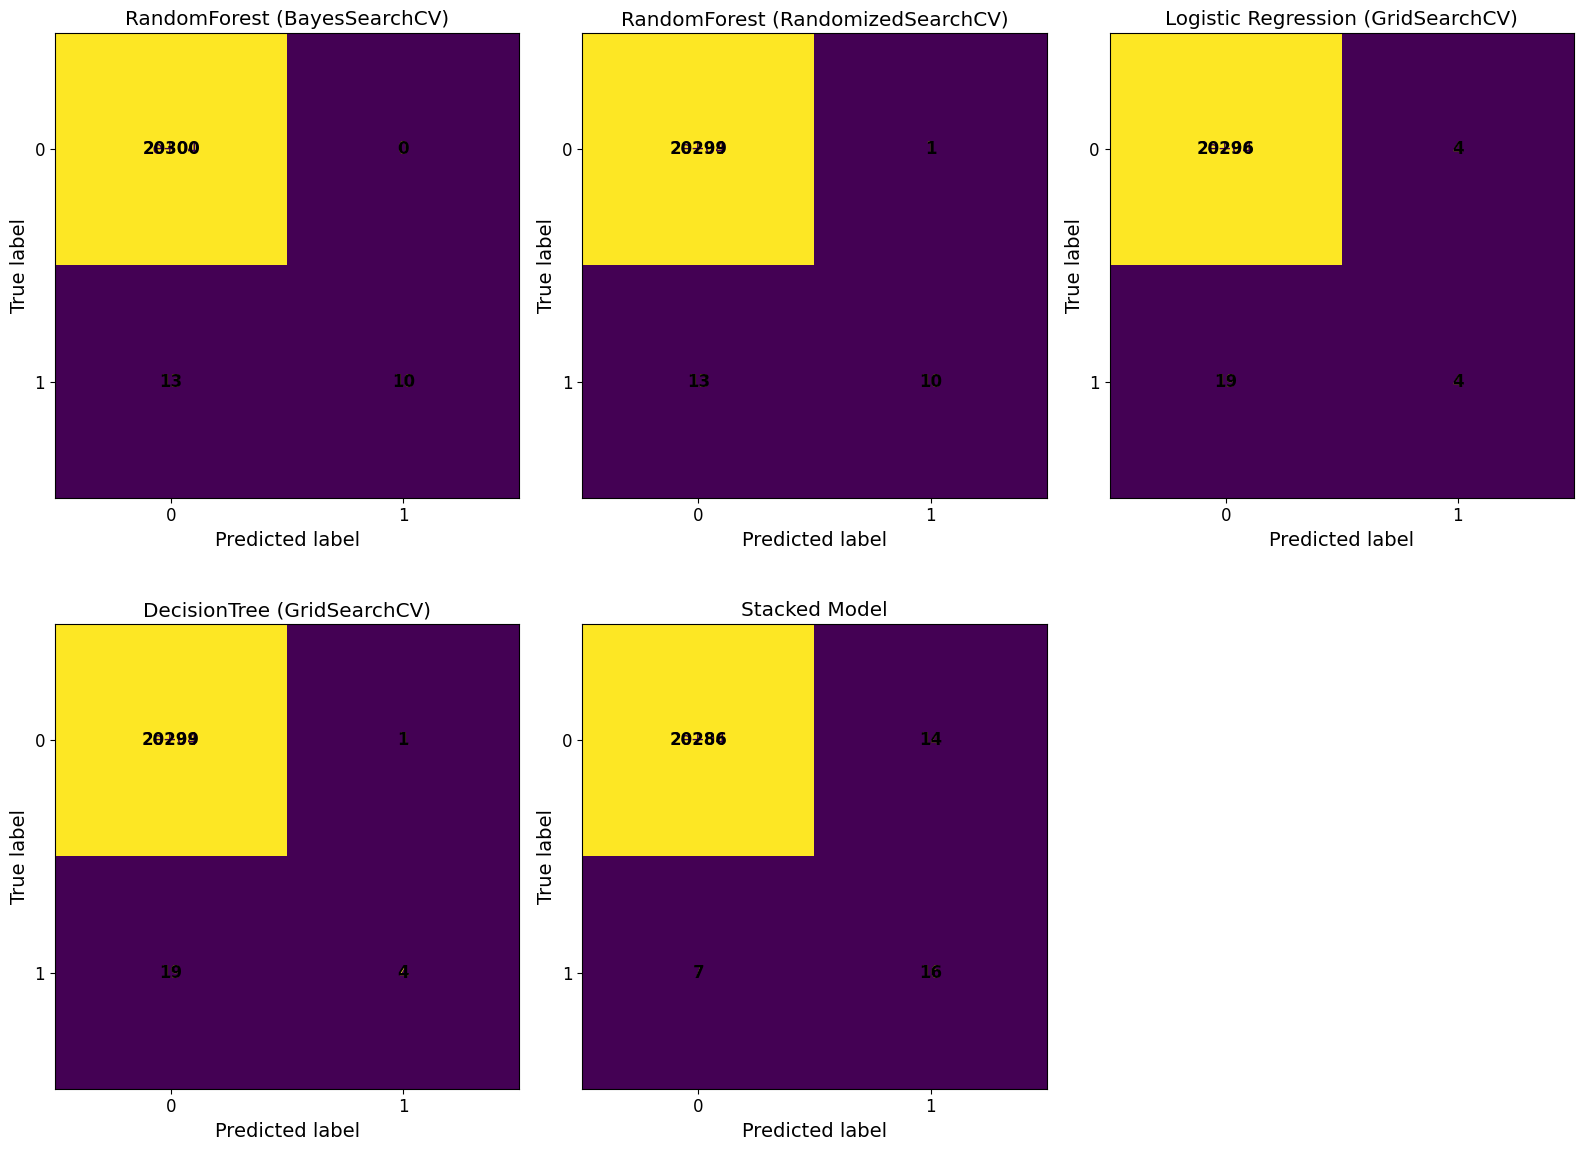

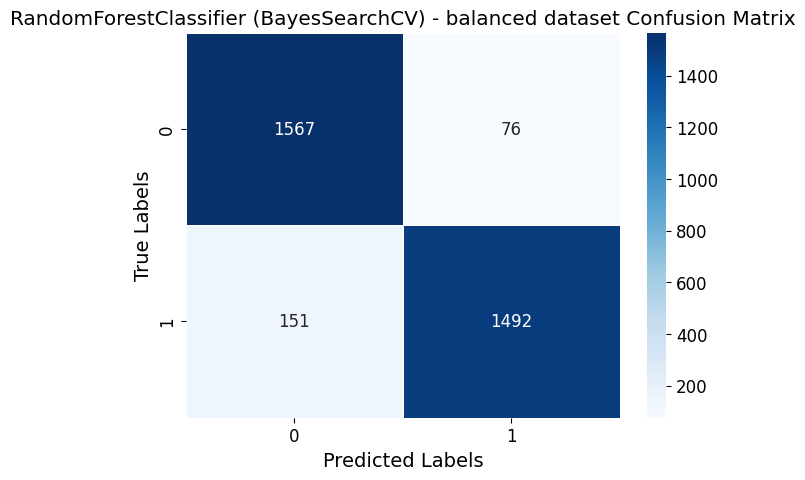

Current Timestamp:  2024-04-12 18:16:40.649884


In [82]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming y_test is the test labels
# Assuming we have predictions for each model
predictions_all = [
    (y_pred_randomforest_bayessearch, 'RandomForest (BayesSearchCV)'),
    (y_pred_randomforest_randomsearch, 'RandomForest (RandomizedSearchCV)'),
    (y_pred_log_reg_grid, 'Logistic Regression (GridSearchCV)'),
	  (d_tree_pred, 'DecisionTree (GridSearchCV)'),
	  (y_pred_stacked, 'Stacked Model')
]

# Set up a grid of plots
# The number of rows and columns depends on the number of models (or sets of predictions)
nrows, ncols = 2, 3  # Adjust based on the number of models you have
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)  # Adjust spacing to prevent label overlap

# Flatten the array of axes for easy iteration
axs = axs.flatten()


for i, (y_pred, name) in enumerate(predictions_all):
    ax = axs[i]  # Corrected to use the ith subplot for plotting
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred) # Compute confusion matrix

    # Create the ConfusionMatrixDisplay
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

    # Plot the confusion matrix on the correct subplot axis
    disp.plot(ax=axs[i], colorbar=False) # Plot confusion matrix without colorbar
    ax.title.set_text(name)

    # Iterate over the confusion matrix and set the annotations manually to prevent overlap
    #for labels, count in np.ndenumerate(cm):
        #row, col = labels
        #ax.text(x=col, y=row, s=count, va='center', ha='center',
                #fontsize=11, color='yellow', fontweight='bold')

    # Iterate over the confusion matrix and add text annotations in the center of each cell
    for (j, k), value in np.ndenumerate(cm):
        ax.text(k, j, format(value, 'd'), ha='center', va='center', fontsize=12, color='black', fontweight='bold')  # Adjust fontsize as needed

# Hide any unused subplots
for j in range(i + 1, nrows * ncols):
    fig.delaxes(axs[j])

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

# Plot the confusion matrix to check the true positive and false positive visa versa for Using BayesSearchCV with RandomForestClassifier

plot_confusion_matrix(y_balanced_test, y_pred_randomforest_bayessearch_balanced, "RandomForestClassifier (BayesSearchCV) - balanced dataset")

print_timestamp()